<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#Cluster-B-clonotypes" data-toc-modified-id="Cluster-B-clonotypes-4.1">Cluster B clonotypes</a></span></li><li><span><a href="#Gini-index-for-octamers" data-toc-modified-id="Gini-index-for-octamers-4.2">Gini index for octamers</a></span></li><li><span><a href="#Plot-gini" data-toc-modified-id="Plot-gini-4.3">Plot gini</a></span></li><li><span><a href="#circle-plot-samples" data-toc-modified-id="circle-plot-samples-4.4">circle plot samples</a></span></li><li><span><a href="#Survival-based-on-gini" data-toc-modified-id="Survival-based-on-gini-4.5">Survival based on gini</a></span></li><li><span><a href="#cytokine-expression-MHC-class-II-and-clonality" data-toc-modified-id="cytokine-expression-MHC-class-II-and-clonality-4.6">cytokine expression MHC class II and clonality</a></span></li><li><span><a href="#Deseq2-for-NBL" data-toc-modified-id="Deseq2-for-NBL-4.7">Deseq2 for NBL</a></span></li></ul></li><li><span><a href="#Table-S6" data-toc-modified-id="Table-S6-5">Table S6</a></span></li><li><span><a href="#Numbers-in-text" data-toc-modified-id="Numbers-in-text-6">Numbers in text</a></span></li><li><span><a href="#Deprecated" data-toc-modified-id="Deprecated-7">Deprecated</a></span><ul class="toc-item"><li><span><a href="#Clusters" data-toc-modified-id="Clusters-7.1">Clusters</a></span></li><li><span><a href="#Splot-of-number-of-cdr3s-and-clusters" data-toc-modified-id="Splot-of-number-of-cdr3s-and-clusters-7.2">Splot of number of cdr3s and clusters</a></span></li><li><span><a href="#correlate-normalized-clusters-with-genes" data-toc-modified-id="correlate-normalized-clusters-with-genes-7.3">correlate normalized clusters with genes</a></span></li><li><span><a href="#levels-of-SHM-ie-normalized-clusters-in-samples-with->-median-cdr3-is-assoctiaed-with-worse-PFS-in-pedLGG" data-toc-modified-id="levels-of-SHM-ie-normalized-clusters-in-samples-with->-median-cdr3-is-assoctiaed-with-worse-PFS-in-pedLGG-7.4">levels of SHM ie normalized clusters in samples with &gt; median cdr3 is assoctiaed with worse PFS in pedLGG</a></span></li><li><span><a href="#PFS" data-toc-modified-id="PFS-7.5">PFS</a></span></li><li><span><a href="#DEseq2-for-CBTTC" data-toc-modified-id="DEseq2-for-CBTTC-7.6">DEseq2 for CBTTC</a></span></li><li><span><a href="#expression-correlation" data-toc-modified-id="expression-correlation-7.7">expression correlation</a></span></li><li><span><a href="#TMB-and-gini" data-toc-modified-id="TMB-and-gini-7.8">TMB and gini</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [4]:
library(igraph)
library(ggraph)
#library(ppcor)
library(ineq)

In [3]:
library(plyr)
library(dplyr)
library(ggplot2)
library(ggbeeswarm)
library(Hmisc)
library(reshape2)
library(grid)
library(gtable)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:plyr’:

    is.discrete, summarize


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths


The following object is masked from ‘package:igraph’:

    crossing




# Functions

In [5]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/Heatmap_functions.R")
source("~/OneDrive - UHN/R_src/Oncoprint_functions.R")
source("~/OneDrive - UHN/R_src/diversity_Splot_functions.R")

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



Attaching package: ‘circlize’


The following object is masked

In [6]:
circlepack.reads.fx <- function(inputfile, sample_id){
#inputfile is: all_clustered_IGH_12rm
    sample_df <- inputfile[inputfile$sample_id == sample_id,]

    octamer_tab <- as.data.frame(table(sample_df$octamer), stringsAsFactors = F)
# Clusters Should have only octamers > 3 sequences 
    cluster_tab <- octamer_tab[octamer_tab$Freq > 2,]
# if there is a cluster, group cdr3s and use sum of reads

    if(nrow(cluster_tab) != 0){    
        cluster_tab$octamerreads <- NA
        for(j in 1:nrow(cluster_tab)){
            myoctamer <- cluster_tab$Var1[j]
            octamerreads <- sum(sample_df$cloneCount[which(sample_df$octamer == myoctamer)])
            cluster_tab$octamerreads[j] <- octamerreads
        }
#clean up cluster_tab
        cluster_tab <- cluster_tab[, c("Var1", "octamerreads")]
        colnames(cluster_tab) <- c("name", "size")
    }
    
# Make edge df
    octamer_cdr3 <- sample_df[, c("octamer", "nSeqCDR3")]
    colnames(octamer_cdr3) <- c("from", "to")
#if no clusters, edge df is octamer_cdr3 df and all octamers will be replaced by sample_id
    if(nrow(cluster_tab) == 0) {
        myedge <- octamer_cdr3
        myedge[,"from"] <- unique(sample_df$sample_id)
    }
    
# if there is a cluster, make a list of sample_id and clusters
    if(nrow(cluster_tab) != 0){
        myclusters <- cbind.data.frame(NA,cluster_tab$name, stringsAsFactors = F)
        colnames(myclusters) <- c("from", "to")
        myclusters$from <- unique(sample_df$sample_id)
# replace octamers < 3 sequences with sample_id
        octamer_cdr3$from[!octamer_cdr3$from %in% cluster_tab$name] <- unique(sample_df$sample_id)
        myedge <- rbind(myclusters, octamer_cdr3)   
    }

    
#vertix df  

# get cdr3 and reads    
    cdr3_freq <- sample_df[, c("nSeqCDR3", "cloneCount")]
    colnames(cdr3_freq) <- c("name", "size")
# get sample frequency        
    sample_tab <- as.data.frame(table(sample_df$sample_id), stringsAsFactors = F)
    colnames(sample_tab) <- c("name", "size")

#bind all and cleanup
    myvertex <- rbind(sample_tab, cdr3_freq)
                      
# if there is a cluster, include it to vertex
    if(nrow(cluster_tab) != 0){
        myvertex <- rbind(myvertex, cluster_tab)
    }

# first row is NA so remove it
    myvertex <- myvertex[!is.na(myvertex$name),]
    myvertex$size <- as.numeric(myvertex$size)
    
# Make a type variable for colors
    myvertex$type <- NA
    myvertex$type[myvertex$name %in% cdr3_freq$name] <- "CDR3"
# If there is cluster, name it as octamer to color
    if(nrow(cluster_tab) != 0){
        myvertex$type[myvertex$name %in% cluster_tab$name] <- "octamer"
    }
    
#Make graph and plot    
    mygraph <- graph_from_data_frame(myedge, vertices = myvertex)  
    colpal <- c("CDR3" = "light grey","octamer" = "blue")
    alphapal <- c("CDR3" = 1,"octamer" = 0.4)
    
    circlep <- ggraph(mygraph, layout = 'circlepack', weight = size) + 
    geom_node_circle(aes(fill = type, alpha = type)) +
    theme_void() + scale_fill_manual(values = colpal ,na.value="transparent") +
    scale_alpha_manual(values = alphapal)
    
    pdf(file = paste0(plotpath,sample_id,"IGHreads_circles.pdf"),
        width = 15, 
        height = 15,
        useDingbats = FALSE)
    print(circlep)
    dev.off()
}

In [7]:
circlepack.fx <- function(inputfile, sample_id){
#inputfile is: all_clustered_IGH_12rm
    sample_df <- inputfile[inputfile$sample_id == sample_id,]
    octamer_tab <- as.data.frame(table(sample_df$octamer), stringsAsFactors = F)
# Should have only octamers > 3 sequences
    octamer_tab <- octamer_tab[octamer_tab$Freq > 2,]
    
# Make edge df
    myedge <- cbind.data.frame(NA,octamer_tab$Var1, stringsAsFactors = F)
    colnames(myedge) <- c("from", "to")
    myedge$from <- unique(sample_df$sample_id)
    octamer_cdr3 <- sample_df[, c("octamer", "nSeqCDR3")]
    colnames(octamer_cdr3) <- c("from", "to")
# make a list of octamer-cdr3s and replace octamers < 3 sequences with sample_id
    octamer_cdr3$from[!octamer_cdr3$from %in% octamer_tab$Var1] <- unique(sample_df$sample_id)
    myedge <- rbind(myedge, octamer_cdr3)
    
#vertix df    
    myvertex <- cbind.data.frame(NA,NA ,stringsAsFactors = F)
    colnames(myvertex) <- c("Var1", "Freq")
# get cdr3 frequencies    
    cdr3_freq <- as.data.frame(table(sample_df$nSeqCDR3), stringsAsFactors = F)
    colnames(cdr3_freq) <- c("name", "size")
# get sample frequency    
    sample_tab <- as.data.frame(table(sample_df$sample_id), stringsAsFactors = F)
#bind all and cleanup
    myvertex <- rbind(myvertex, octamer_tab, sample_tab)
# first row is NA so remove it
    myvertex <- myvertex[!is.na(myvertex$Var1),]
    myvertex$Freq <- as.numeric(myvertex$Freq)
    colnames(myvertex) <- c("name", "size")
    myvertex <- rbind(myvertex, cdr3_freq)
    
# Make a type variable for colors
    myvertex$type <- NA
    myvertex$type[myvertex$name %in% octamer_tab$Var1] <- "octamer"
    myvertex$type[myvertex$name %in% cdr3_freq$name] <- "CDR3"
    
#Make graph and plot    
    mygraph <- graph_from_data_frame(myedge, vertices = myvertex)  
    colpal <- c("CDR3" = "light grey","octamer" = "blue")
    alphapal <- c("CDR3" = 1,"octamer" = 0.5)
    circlep <- ggraph(mygraph, layout = 'circlepack', weight = size) + 
    geom_node_circle(aes(fill = type, alpha = type)) +
    theme_void() + scale_fill_manual(values = colpal ,na.value="transparent") +
    scale_alpha_manual(values = alphapal)
    
    pdf(file = paste0(plotpath,sample_id,"IGH_circles.pdf"),
        width = 15, 
        height = 15,
        useDingbats = FALSE)
    print(circlep)
    dev.off()
}

# Paths

In [7]:
mountpath <- "/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/"

In [8]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [9]:
load(paste0(datapath, "QuanTIseq/primary_estimate_manifest_quanti.RData"))

## Cluster B clonotypes

See cavatica analysis IPD2 B cell cluster notebook for input to the plots

In [10]:
allfiles_clustered <- list.files(mountpath, pattern = "Clustered_CLONES", full.names = T, recursive = T)

In [11]:
head(allfiles_clustered)

character(0)

In [16]:
all.files.clustered <- lapply(allfiles_clustered, 
                    function(f){read.table(f, header = TRUE, sep = "\t", stringsAsFactors = F)})

Add filenames as names

In [17]:
myfilesnames <- allfiles_clustered

In [18]:
names(all.files.clustered) <- gsub(".*Clustered_CLONES_IGH_", "", myfilesnames)
names(all.files.clustered) <- gsub(".txt", "", names(all.files.clustered))

In [19]:
head(all.files.clustered)

cloneCount,cloneFraction,clonalSequence,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,allDAlignments,allJAlignments,allCAlignments,nSeqCDR3,aaSeqCDR3,octamer
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6,0.22222222,TGTGCGAAAGGGAGGGCGACTATGTTGGGCTCCTTTGCCTACTGG,"IGHV3-30*00(395.7),IGHV3-53*00(395.7),IGHV3-66*00(395.7),IGHV3-23*00(394.7),IGHV3-33*00(379.7)","IGHD3-10*00(30),IGHD3-22*00(30)",IGHJ4*00(143.3),IGHA1*00(352.3),342|349|373|0|7||35.0;339|346|370|0|7||35.0;339|346|370|0|7||35.0;342|352|373|0|10||50.0;342|349|373|0|7||35.0,36|42|93|18|24||30.0;36|42|93|18|24||30.0,24|37|68|32|45|SA29C|49.0,,TGTGCGAAAGGGAGGGCGACTATGTTGGGCTCCTTTGCCTACTGG,CAKGRATMLGSFAYW,AKGRATML
5,0.18518519,TGTGCGAGAGATGATGATACTAGTGGACATTACGGGTTATTTCACTACTGG,"IGHV3-33*00(287),IGHV3-30*00(272),IGHV3-48*00(271),IGHV3-66*00(256),IGHV3-7*00(255)",IGHD3-22*00(52),IGHJ4*00(183),IGHA2*00(240),342|354|373|0|12||60.0;342|354|373|0|12||60.0;342|354|373|0|12||60.0;339|351|370|0|12||60.0;342|354|373|0|12||60.0,39|59|93|13|33|SG45CST52AST53C|52.0,25|37|68|39|51|SG28C|44.0,,TGTGCGAGAGATGATGATACTAGTGGACATTACGGGTTATTTCACTACTGG,CARDDDTSGHYGLFHYW,ARDDDTSG
4,0.14814815,TGTGCGCGAGACGCAGCCATTGAGTACTTCGAGTACTGG,IGHV3-60*00(92),"IGHD5-24*00(30),IGHD6-19*00(30)",IGHJ1*00(170),IGHA1*00(315),343|347|374|0|4||20.0,8|14|60|14|20||30.0;4|10|63|13|19||30.0,22|41|72|20|39|SA25GSC32GSC35T|47.0,,TGTGCGCGAGACGCAGCCATTGAGTACTTCGAGTACTGG,CARDAAIEYFEYW,ARDAAIEY
3,0.11111111,TGTGCGAGTCTGGATACAGCTATAAGTCCTGTCAATGCCTACTGG,IGHV3-7*00(678),"IGHD5-18*00(65),IGHD5-5*00(65)","IGHJ4*00(190),IGHJ5*00(175)","IGHG1*00(104),IGHG2*00(104),IGHGP*00(104)",342|350|373|0|8||40.0,21|34|60|10|23||65.0;21|34|60|10|23||65.0,30|37|68|38|45||35.0;36|40|71|41|45||20.0,;;,TGTGCGAGTCTGGATACAGCTATAAGTCCTGTCAATGCCTACTGG,CASLDTAISPVNAYW,ASLDTAIS
3,0.11111111,TGTGCGAGAGACTGGGGGAGTGGTTATTTGGTCCATGACTACTGG,"IGHV1-18*00(138),IGHV1-2*00(138),IGHV3-11*00(138),IGHV3-53*00(138),IGHV4-4*00(122)",IGHD3-3*00(60),IGHJ4*00(205),"IGHG1*00(154),IGHG2*00(154),IGHGP*00(138)",342|353|373|0|11||55.0;342|353|373|0|11||55.0;342|353|373|0|11||55.0;339|350|370|0|11||55.0;339|350|370|0|11||55.0,45|57|93|16|28||60.0,27|37|68|35|45||50.0,;;,TGTGCGAGAGACTGGGGGAGTGGTTATTTGGTCCATGACTACTGG,CARDWGSGYLVHDYW,ARDWGSGY
1,0.03703704,TGTGCGAGACACCCCCCTGTCCGGGGAATTTTCGCTGCAGAATATTACTACTACATGGACGTCTGG,"IGHV3-23*00(99),IGHV4-31*00(93),IGHV4-4*00(93),IGHV4-59*00(93),IGHV4-61*00(93)","IGHD3-10*00(30),IGHD6-25*00(30),IGHD6-6*00(30)",IGHJ6*00(196),,342|349|373|0|7||35.0;345|354|376|0|9||45.0;339|348|370|0|9||45.0;339|348|370|0|9||45.0;345|354|376|0|9||45.0,45|51|93|21|27||30.0;5|11|54|32|38||30.0;32|38|54|18|24||30.0,31|52|83|45|66||105.0,,TGTGCGAGACACCCCCCTGTCCGGGGAATTTTCGCTGCAGAATATTACTACTACATGGACGTCTGG,CARHPPVRGIFAAEYYYYMDVW,ARHPPVRG
1,0.03703704,TGTGCGAGACATTCCCTCTCTTGTGATGGCAATGGTTGCTCTGCGGCTTACATGGACGTCTGG,"IGHV5-10-1*00(114),IGHV5-51*00(114)","IGHD2-8*00(30),IGHD5-24*00(30),IGHD6-25*00(30)",IGHJ6*00(214),IGHG1*00(294),342|354|373|0|12||60.0;342|354|373|0|12||60.0,44|50|93|30|36||30.0;25|31|60|24|30||30.0;28|34|54|42|48||30.0,37|52|83|48|63||75.0,,TGTGCGAGACATTCCCTCTCTTGTGATGGCAATGGTTGCTCTGCGGCTTACATGGACGTCTGG,CARHSLSCDGNGCSAAYMDVW,ARHSLSCD
1,0.03703704,TGTGCGAGACTTAAAATCGTCGGCCAGGTCGGCGGTCACTGGTTCTTCGATCTCTGG,"IGHV4-39*00(163),IGHV4-4*00(158),IGHV4-55*00(158),IGHV4-59*00(142),IGHV4-61*00(142)",IGHD3-3*00(40),IGHJ2*00(239),"IGHG1*00(140),IGHG2*00(140),IGHGP*00(140),IGHG3*00(124),IGHG4*00(124)",345|355|376|0|10||50.0;339|348|370|0|9||45.0;342|351|373|0|9||45.0;339|348|370|0|9||45.0;345|354|376|0|9||45.0,18|26|93|12|20||40.0,22|42|73|37|57|SA28T|84.0,;;;;,TGTGCGAGACTTAAAATCGTCGGCCAGGTCGGCGGTCACTGGTTCTTCGATCTCTGG,CARLKIVGQVGGHWFFDLW,ARLKIVGQ
1,0.03703704,TGTGCGAGAGATGACGGTACTAGTAGTCATTTTGAAATCCTTCAATACTGG,"IGHV3-33*00(539),IGHV3-30*00(507)","IGHD4-17*00(40),IGHD4-23*00(40),IGHD4-4*00(40)","IGHJ4*00(185),IGHJ5*00(175),IGHJ1*00(164)","IGHA1*00(155),IGHA2*00(155)",342|354|373|0|12||60

bind all in a df

In [20]:
all.clustered <- do.call("rbind", all.files.clustered)

add filenmaes as a variable and remove rownmaes

In [21]:
all.clustered$filename <- rep(names(all.files.clustered), sapply(all.files.clustered, nrow))

In [22]:
rownames(all.clustered) <- NULL

In [23]:
all.clustered$sample_id <- gsub("_.*", "", all.clustered$filename)
all.clustered$aliquot <- gsub(".*_", "", all.clustered$filename)

In [24]:
head(all.clustered)

cloneCount,cloneFraction,clonalSequence,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,allDAlignments,allJAlignments,allCAlignments,nSeqCDR3,aaSeqCDR3,octamer,filename,sample_id,aliquot
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6,0.22222222,TGTGCGAAAGGGAGGGCGACTATGTTGGGCTCCTTTGCCTACTGG,"IGHV3-30*00(395.7),IGHV3-53*00(395.7),IGHV3-66*00(395.7),IGHV3-23*00(394.7),IGHV3-33*00(379.7)","IGHD3-10*00(30),IGHD3-22*00(30)",IGHJ4*00(143.3),IGHA1*00(352.3),342|349|373|0|7||35.0;339|346|370|0|7||35.0;339|346|370|0|7||35.0;342|352|373|0|10||50.0;342|349|373|0|7||35.0,36|42|93|18|24||30.0;36|42|93|18|24||30.0,24|37|68|32|45|SA29C|49.0,,TGTGCGAAAGGGAGGGCGACTATGTTGGGCTCCTTTGCCTACTGG,CAKGRATMLGSFAYW,AKGRATML,7316-10_717108,7316-10,717108
5,0.18518519,TGTGCGAGAGATGATGATACTAGTGGACATTACGGGTTATTTCACTACTGG,"IGHV3-33*00(287),IGHV3-30*00(272),IGHV3-48*00(271),IGHV3-66*00(256),IGHV3-7*00(255)",IGHD3-22*00(52),IGHJ4*00(183),IGHA2*00(240),342|354|373|0|12||60.0;342|354|373|0|12||60.0;342|354|373|0|12||60.0;339|351|370|0|12||60.0;342|354|373|0|12||60.0,39|59|93|13|33|SG45CST52AST53C|52.0,25|37|68|39|51|SG28C|44.0,,TGTGCGAGAGATGATGATACTAGTGGACATTACGGGTTATTTCACTACTGG,CARDDDTSGHYGLFHYW,ARDDDTSG,7316-10_717108,7316-10,717108
4,0.14814815,TGTGCGCGAGACGCAGCCATTGAGTACTTCGAGTACTGG,IGHV3-60*00(92),"IGHD5-24*00(30),IGHD6-19*00(30)",IGHJ1*00(170),IGHA1*00(315),343|347|374|0|4||20.0,8|14|60|14|20||30.0;4|10|63|13|19||30.0,22|41|72|20|39|SA25GSC32GSC35T|47.0,,TGTGCGCGAGACGCAGCCATTGAGTACTTCGAGTACTGG,CARDAAIEYFEYW,ARDAAIEY,7316-10_717108,7316-10,717108
3,0.11111111,TGTGCGAGTCTGGATACAGCTATAAGTCCTGTCAATGCCTACTGG,IGHV3-7*00(678),"IGHD5-18*00(65),IGHD5-5*00(65)","IGHJ4*00(190),IGHJ5*00(175)","IGHG1*00(104),IGHG2*00(104),IGHGP*00(104)",342|350|373|0|8||40.0,21|34|60|10|23||65.0;21|34|60|10|23||65.0,30|37|68|38|45||35.0;36|40|71|41|45||20.0,;;,TGTGCGAGTCTGGATACAGCTATAAGTCCTGTCAATGCCTACTGG,CASLDTAISPVNAYW,ASLDTAIS,7316-10_717108,7316-10,717108
3,0.11111111,TGTGCGAGAGACTGGGGGAGTGGTTATTTGGTCCATGACTACTGG,"IGHV1-18*00(138),IGHV1-2*00(138),IGHV3-11*00(138),IGHV3-53*00(138),IGHV4-4*00(122)",IGHD3-3*00(60),IGHJ4*00(205),"IGHG1*00(154),IGHG2*00(154),IGHGP*00(138)",342|353|373|0|11||55.0;342|353|373|0|11||55.0;342|353|373|0|11||55.0;339|350|370|0|11||55.0;339|350|370|0|11||55.0,45|57|93|16|28||60.0,27|37|68|35|45||50.0,;;,TGTGCGAGAGACTGGGGGAGTGGTTATTTGGTCCATGACTACTGG,CARDWGSGYLVHDYW,ARDWGSGY,7316-10_717108,7316-10,717108
1,0.03703704,TGTGCGAGACACCCCCCTGTCCGGGGAATTTTCGCTGCAGAATATTACTACTACATGGACGTCTGG,"IGHV3-23*00(99),IGHV4-31*00(93),IGHV4-4*00(93),IGHV4-59*00(93),IGHV4-61*00(93)","IGHD3-10*00(30),IGHD6-25*00(30),IGHD6-6*00(30)",IGHJ6*00(196),,342|349|373|0|7||35.0;345|354|376|0|9||45.0;339|348|370|0|9||45.0;339|348|370|0|9||45.0;345|354|376|0|9||45.0,45|51|93|21|27||30.0;5|11|54|32|38||30.0;32|38|54|18|24||30.0,31|52|83|45|66||105.0,,TGTGCGAGACACCCCCCTGTCCGGGGAATTTTCGCTGCAGAATATTACTACTACATGGACGTCTGG,CARHPPVRGIFAAEYYYYMDVW,ARHPPVRG,7316-10_717108,7316-10,717108


subset to samples in quanti df

In [25]:
all_clustered_IGH <- merge(all.clustered, primary_estimate_manifest_quanti[,c("sample_id", "aliquot_id", "cohort")], by = "sample_id")

In [26]:
dim(all_clustered_IGH)

[1] 184229     19

In [27]:
head(all_clustered_IGH)

sample_id,cloneCount,cloneFraction,clonalSequence,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,allDAlignments,allJAlignments,allCAlignments,nSeqCDR3,aaSeqCDR3,octamer,filename,aliquot,aliquot_id,cohort
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7316-10,1,0.03703704,TGTGCGAGACTTAAAATCGTCGGCCAGGTCGGCGGTCACTGGTTCTTCGATCTCTGG,"IGHV4-39*00(163),IGHV4-4*00(158),IGHV4-55*00(158),IGHV4-59*00(142),IGHV4-61*00(142)",IGHD3-3*00(40),IGHJ2*00(239),"IGHG1*00(140),IGHG2*00(140),IGHGP*00(140),IGHG3*00(124),IGHG4*00(124)",345|355|376|0|10||50.0;339|348|370|0|9||45.0;342|351|373|0|9||45.0;339|348|370|0|9||45.0;345|354|376|0|9||45.0,18|26|93|12|20||40.0,22|42|73|37|57|SA28T|84.0,;;;;,TGTGCGAGACTTAAAATCGTCGGCCAGGTCGGCGGTCACTGGTTCTTCGATCTCTGG,CARLKIVGQVGGHWFFDLW,ARLKIVGQ,7316-10_717108,717108,717108,NFB
7316-10,4,0.14814815,TGTGCGCGAGACGCAGCCATTGAGTACTTCGAGTACTGG,IGHV3-60*00(92),"IGHD5-24*00(30),IGHD6-19*00(30)",IGHJ1*00(170),IGHA1*00(315),343|347|374|0|4||20.0,8|14|60|14|20||30.0;4|10|63|13|19||30.0,22|41|72|20|39|SA25GSC32GSC35T|47.0,,TGTGCGCGAGACGCAGCCATTGAGTACTTCGAGTACTGG,CARDAAIEYFEYW,ARDAAIEY,7316-10_717108,717108,717108,NFB
7316-10,1,0.03703704,TGCGCGAGGTCTCGCACACCTATGATTACCTTCCACTGGTTCGACCCCTGG,"IGHV5-10-1*00(107),IGHV5-51*00(107)",IGHD3-16*00(45),IGHJ5*00(208),"IGHG1*00(180),IGHG2*00(164)",342|350|373|0|8|ST344C|24.0;342|350|373|0|8|ST344C|24.0,41|50|111|20|29||45.0,23|40|71|34|51||85.0,;,TGCGCGAGGTCTCGCACACCTATGATTACCTTCCACTGGTTCGACCCCTGG,CARSRTPMITFHWFDPW,ARSRTPMI,7316-10_717108,717108,717108,NFB
7316-10,1,0.03703704,TGTGCGAGAGATGACGGTACTAGTAGTCATTTTGAAATCCTTCAATACTGG,"IGHV3-33*00(539),IGHV3-30*00(507)","IGHD4-17*00(40),IGHD4-23*00(40),IGHD4-4*00(40)","IGHJ4*00(185),IGHJ5*00(175),IGHJ1*00(164)","IGHA1*00(155),IGHA2*00(155)",342|354|373|0|12||60.0;342|354|373|0|12||60.0,9|17|48|22|30||40.0;12|20|57|22|30||40.0;9|17|48|22|30||40.0,31|37|68|45|51||30.0;36|40|71|47|51||20.0;36|41|72|46|51||25.0,;,TGTGCGAGAGATGACGGTACTAGTAGTCATTTTGAAATCCTTCAATACTGG,CARDDGTSSHFEILQYW,ARDDGTSS,7316-10_717108,717108,717108,NFB
7316-10,1,0.03703704,TGTGCGAGACACCCCCCTGTCCGGGGAATTTTCGCTGCAGAATATTACTACTACATGGACGTCTGG,"IGHV3-23*00(99),IGHV4-31*00(93),IGHV4-4*00(93),IGHV4-59*00(93),IGHV4-61*00(93)","IGHD3-10*00(30),IGHD6-25*00(30),IGHD6-6*00(30)",IGHJ6*00(196),,342|349|373|0|7||35.0;345|354|376|0|9||45.0;339|348|370|0|9||45.0;339|348|370|0|9||45.0;345|354|376|0|9||45.0,45|51|93|21|27||30.0;5|11|54|32|38||30.0;32|38|54|18|24||30.0,31|52|83|45|66||105.0,,TGTGCGAGACACCCCCCTGTCCGGGGAATTTTCGCTGCAGAATATTACTACTACATGGACGTCTGG,CARHPPVRGIFAAEYYYYMDVW,ARHPPVRG,7316-10_717108,717108,717108,NFB
7316-10,3,0.11111111,TGTGCGAGTCTGGATACAGCTATAAGTCCTGTCAATGCCTACTGG,IGHV3-7*00(678),"IGHD5-18*00(65),IGHD5-5*00(65)","IGHJ4*00(190),IGHJ5*00(175)","IGHG1*00(104),IGHG2*00(104),IGHGP*00(104)",342|350|373|0|8||40.0,21|34|60|10|23||65.0;21|34|60|10|23||65.0,30|37|68|38|45||35.0;36|40|71|41|45||20.0,;;,TGTGCGAGTCTGGATACAGCTATAAGTCCTGTCAATGCCTACTGG,CASLDTAISPVNAYW,ASLDTAIS,7316-10_717108,717108,717108,NFB


remove singlet and dublet cdr3

In [28]:
all_clustered_IGH_12rm <- all_clustered_IGH[all_clustered_IGH$cloneCount > 2,]

In [29]:
cdr3_count <- as.data.frame(table(all_clustered_IGH_12rm$sample_id), stringsAsFactors = F)

In [30]:
head(cdr3_count)

Var1,Freq
<chr>,<int>
7316-10,5
7316-100,41
7316-1060,2
7316-1064,10
7316-1075,106
7316-1078,4


In [31]:
dim(cdr3_count)

[1] 489   2

count octamers for each sample

In [32]:
for(i in 1:nrow(cdr3_count)){
    tmp <- all_clustered_IGH_12rm[all_clustered_IGH_12rm$sample_id == cdr3_count$Var1[i],]
    octamerfreq <- as.data.frame(table(tmp$octamer))
    octamercount <- nrow(octamerfreq)
    cdr3_count$octamer[i] <- octamercount
    
}

In [33]:
head(cdr3_count)

Var1,Freq,octamer
<chr>,<int>,<int>
7316-10,5,5
7316-100,41,41
7316-1060,2,2
7316-1064,10,10
7316-1075,106,103
7316-1078,4,4


count number of clusters with more than 3 cdr3 ssequnece

In [34]:
cdr3_count$cluster <- NA
for(i in 1:nrow(cdr3_count)){
    tmp <- all_clustered_IGH_12rm[all_clustered_IGH_12rm$sample_id == cdr3_count$Var1[i],]
    if(nrow(tmp) < 2){next()}
    octamerfreq <- as.data.frame(table(tmp$octamer))
    clustercount <- nrow(octamerfreq[octamerfreq$Freq >= 3,])
    cdr3_count$cluster[i] <- clustercount
    
}

In [35]:
dim(cdr3_count)

[1] 489   4

In [36]:
summary(cdr3_count$cluster)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   2.601   0.500 187.000      78 

remove samples with < 2 sequences

In [37]:
cdr3_count <- cdr3_count[cdr3_count$Freq > 2,]

In [38]:
summary(cdr3_count$cluster)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   2.881   1.000 187.000 

In [39]:
head(cdr3_count)

,Var1,Freq,octamer,cluster
,<chr>,<int>,<int>,<int>
1,7316-10,5,5,0
2,7316-100,41,41,0
4,7316-1064,10,10,0
5,7316-1075,106,103,0
6,7316-1078,4,4,0
7,7316-1081,64,48,4


In [40]:
dim(cdr3_count)

[1] 371   4

In [41]:
colnames(cdr3_count) <- c("sample_id", "cdr3", "octamer", "cluster")

keep only those octamers that have more than 2 cdr3s

In [42]:
all_clustered_IGH_12rm_clusters <- all_clustered_IGH_12rm[0,]
for(i in 1:nrow(cdr3_count)){
    mysample <- cdr3_count$sample_id[i]
    message(mysample)
    tmp <- all_clustered_IGH_12rm[all_clustered_IGH_12rm$sample_id == mysample,]
    table_octamer <- as.data.frame(table(tmp$octamer), stringsAsFactors = F)
#remove octamers with less than 3 cdr3
    table_octamer_rm <- table_octamer[table_octamer$Freq < 3,]
    tmp_clusters <- tmp[!tmp$octamer %in% table_octamer_rm$Var1,]
    all_clustered_IGH_12rm_clusters <- rbind(all_clustered_IGH_12rm_clusters, tmp_clusters)
    
}

7316-10
7316-100
7316-1064
7316-1075
7316-1078
7316-1081
7316-1082
7316-1084
7316-1087
7316-1090
7316-1093
7316-1094
7316-1095
7316-1107
7316-1108
7316-1115
7316-1134
7316-1137
7316-116
7316-119
7316-122
7316-1226
7316-127
7316-133
7316-134
7316-136
7316-1455
7316-146
7316-147
7316-161
7316-1635
7316-1643
7316-1648
7316-1652
7316-1653
7316-1659
7316-1664
7316-1671
7316-1678
7316-168
7316-1681
7316-1683
7316-1710
7316-1711
7316-173
7316-1744
7316-1748
7316-175
7316-1763
7316-1771
7316-1775
7316-1776
7316-1779
7316-178
7316-1785
7316-1786
7316-1793
7316-1802
7316-1803
7316-184
7316-1854
7316-186
7316-1866
7316-1886
7316-1926
7316-1937
7316-1942
7316-1943
7316-1944
7316-1949
7316-195
7316-1950
7316-1953
7316-1954
7316-1957
7316-196
7316-1965
7316-1972
7316-1975
7316-1977
7316-1978
7316-198
7316-1986
7316-205
7316-206
7316-207
7316-2071
7316-2075
7316-2084
7316-2125
7316-2130
7316-2133
7316-2135
7316-2141
7316-2149
7316-216
7316-2169
7316-2181
7316-2182
7316-2187
7316-2197
7316-2204
7316-2

In [43]:
head(table_octamer)

Var1,Freq
<chr>,<int>
AAHYGDLG,1
AANYYGSG,1
AHRLRYDA,1
AKGIDQMG,1
AKGLIFGV,1
AKLSSSSM,1


In [44]:
dim(all_clustered_IGH_12rm)

[1] 47771    19

In [45]:
dim(all_clustered_IGH_12rm_clusters)

[1] 6087   19

In [46]:
length(unique(all_clustered_IGH_12rm_clusters$sample_id))

[1] 184

remove unknown octamers

In [47]:
all_clustered_IGH_12rm_clusters <- all_clustered_IGH_12rm_clusters[!is.na(all_clustered_IGH_12rm_clusters$octamer),]

In [48]:
dim(all_clustered_IGH_12rm_clusters)

[1] 5259   19

In [49]:
length(unique(all_clustered_IGH_12rm_clusters$sample_id))

[1] 103

In [50]:
head(all_clustered_IGH_12rm_clusters)

,sample_id,cloneCount,cloneFraction,clonalSequence,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,allDAlignments,allJAlignments,allCAlignments,nSeqCDR3,aaSeqCDR3,octamer,filename,aliquot,aliquot_id,cohort
,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1029,7316-1081,19,0.036053131,TGTGCGAGAGAATCTCGAACCCCCAATGGGAACCCATGGTTCGGGGACTTATCCTCCTTTGATTACTGG,IGHV4-31*00(174.9),IGHD3-10*00(69),IGHJ4*00(185.6),IGHG1*00(286.1),345|356|376|0|11||55.0,39|56|93|35|52|SG51C|69.0,24|37|68|56|69|SC30T|49.0,,TGTGCGAGAGAATCTCGAACCCCCAATGGGAACCCATGGTTCGGGGACTTATCCTCCTTTGATTACTGG,CARESRTPNGNPWFGDLSSFDYW,AREFRTPN,7316-1081_731897,731897,731897,pedLGG
1039,7316-1081,35,0.066413662,TGCGCGCGAGTTTCGCGAGAGGCTGGGACCAGAAGAAAGCTGATATTCTTTGACTCCTGG,IGHV4-31*00(340.1),"IGHD2-15*00(30),IGHD2-2*00(30),IGHD3-9*00(30)",IGHJ4*00(186.9),IGHG1*00(147.8),345|355|376|0|10|ST347CSA351C|18.0,33|39|93|41|47||30.0;33|39|93|41|47||30.0;38|44|93|41|47||30.0,24|37|68|47|60|SA32C|49.0,,TGCGCGCGAGTTTCGCGAGAGGCTGGGACCAGAAGAAAGCTGATATTCTTTGACTCCTGG,CARVSREAGTRRKLIFFDSW,ARVSREAG,7316-1081_731897,731897,731897,pedLGG
1045,7316-1081,20,0.037950664,TGTGCGAGACTTCGAAGGGGCACCAACAACTGGTACCAGGCCTACTACCAATACAACGCTATGGACGTCTGG,IGHV4-39*00(289.6),"IGHD2-15*00(43),IGHD1-1*00(40)",IGHJ6*00(121.2),IGHG1*00(105.6),345|355|376|0|10||50.0,10|25|93|41|56|SC14TSC19A|43.0;20|28|51|25|33||40.0,40|52|83|60|72||60.0,,TGTGCGAGACTTCGAAGGGGCACCAACAACTGGTACCAGGCCTACTACCAATACAACGCTATGGACGTCTGG,CARLRRGTNNWYQAYYQYNAMDVW,ARLRRGTN,7316-1081_731897,731897,731897,pedLGG
1055,7316-1081,5,0.009487666,TGTGCGAGAGAATCTCGAACCCCCAATGGGAACCCATTTTTCGGGGACTTATCCTCCTTTGATTACTGG,IGHV4-31*00(236),"IGHD3-10*00(49),IGHD3-16*00(43)",IGHJ4*00(178.8),"IGHG1*00(209.8),IGHG2*00(190.6)",345|356|376|0|11||55.0,43|56|93|39|52|SG51C|49.0;51|66|111|38|53|SG54CSG60C|43.0,24|37|68|56|69|SC30T|49.0,;,TGTGCGAGAGAATCTCGAACCCCCAATGGGAACCCATTTTTCGGGGACTTATCCTCCTTTGATTACTGG,CARESRTPNGNPFFGDLSSFDYW,AREFRTPN,7316-1081_731897,731897,731897,pedLGG
1057,7316-1081,5,0.009487666,TGCGCGAGAGTTTCGCGAGAGGCTGGGACCAGAAGAAAGCTGATATTTTTTGATACCTGG,IGHV4-31*00(329.8),IGHD3-9*00(40),IGHJ5*00(69.6),IGHG1*00(182.8),345|355|376|0|10|ST347C|34.0,38|46|93|41|49||40.0,35|40|71|55|60||25.0,,TGCGCGAGAGTTTCGCGAGAGGCTGGGACCAGAAGAAAGCTGATATTTTTTGATACCTGG,CARVSREAGTRRKLIFFDTW,ARVSREAG,7316-1081_731897,731897,731897,pedLGG
1067,7316-1081,5,0.009487666,TGTACGAGAGAATCTCGAACCCCCAATGGGAACCCATGGTTCGGGGACTTATCCTCCTTTGACTACTGG,"IGHV4-4*00(229.8),IGHV4-59*00(220.2),IGHV4-61*00(220.2),IGHV4-31*00(219.6)",IGHD3-10*00(69),IGHJ4*00(197.6),IGHG1*00(190.6),339|350|370|0|11|SG342A|39.0;339|350|370|0|11|SG342A|39.0;345|356|376|0|11|SG348A|39.0;345|356|376|0|11|SG348A|39.0,39|56|93|35|52|SG51C|69.0,24|37|68|56|69||65.0,,TGTACGAGAGAATCTCGAACCCCCAATGGGAACCCATGGTTCGGGGACTTATCCTCCTTTGACTACTGG,CTRESRTPNGNPWFGDLSSFDYW,ARESRTPN,7316-1081_731897,731897,731897,pedLGG


## Gini index for octamers

To calculate gini, start with list of cdr3s that have more than 2 reads, group reads based on cluster, if exists, then measure gini

In [187]:
summary(cdr3_count$cluster)

ERROR: Error in summary(cdr3_count$cluster): object 'cdr3_count' not found


In [52]:
head(cdr3_count)

,sample_id,cdr3,octamer,cluster
,<chr>,<int>,<int>,<int>
1,7316-10,5,5,0
2,7316-100,41,41,0
4,7316-1064,10,10,0
5,7316-1075,106,103,0
6,7316-1078,4,4,0
7,7316-1081,64,48,4


In [53]:
sample_tab <- as.data.frame(table(all_clustered_IGH_12rm$sample_id), stringsAsFactors = F)

In [54]:
colnames(sample_tab) <- c("sample_id", "unique_cdr3")

In [55]:
dim(sample_tab)

[1] 489   2

In [56]:
sample_tab$gini <- NA
sample_tab$octamers <- NA
for(i in 1:nrow(sample_tab)){
    s <- sample_tab$sample_id[i]
    message(s)
    mysample <- all_clustered_IGH_12rm[all_clustered_IGH_12rm$sample_id == s,]
# if octamer is NA, replace it with cdr3 to count it as one cdr3
    all_clustered_IGH_12rm$octamer[is.na(all_clustered_IGH_12rm$octamer)] <- all_clustered_IGH_12rm$aaSeqCDR3[is.na(all_clustered_IGH_12rm$octamer)] 
    octamer_tab <- as.data.frame(table(mysample$octamer), stringsAsFactors = F)

    octamer_tab$octamerreads <- NA
    for(j in 1:nrow(octamer_tab)){
        myoctamer <- octamer_tab$Var1[j]
        octamerreads <- sum(mysample$cloneCount[which(mysample$octamer == myoctamer)])
        octamer_tab$octamerreads[j] <- octamerreads
    }
    sample_tab$octamers[i] <- length(octamer_tab$Freq)
    sample_tab$gini[i] <- ineq(octamer_tab$octamerreads,type="Gini")
}

7316-10
7316-100
7316-1060
7316-1064
7316-1075
7316-1078
7316-1081
7316-1082
7316-1084
7316-1087
7316-1090
7316-1093
7316-1094
7316-1095
7316-1103
7316-1104
7316-1107
7316-1108
7316-1114
7316-1115
7316-1134
7316-1137
7316-116
7316-119
7316-120
7316-121
7316-1214
7316-122
7316-1226
7316-124
7316-127
7316-133
7316-134
7316-136
7316-1455
7316-146
7316-147
7316-160
7316-161
7316-1635
7316-1637
7316-1643
7316-1648
7316-1652
7316-1653
7316-1654
7316-1659
7316-1660
7316-1664
7316-1669
7316-1671
7316-1678
7316-168
7316-1681
7316-1683
7316-1693
7316-1702
7316-1710
7316-1711
7316-173
7316-1744
7316-1748
7316-175
7316-1763
7316-1767
7316-1771
7316-1775
7316-1776
7316-1779
7316-178
7316-1781
7316-1785
7316-1786
7316-1793
7316-1794
7316-1801
7316-1802
7316-1803
7316-183
7316-184
7316-1844
7316-1845
7316-1854
7316-186
7316-1866
7316-1886
7316-1926
7316-193
7316-1937
7316-1942
7316-1943
7316-1944
7316-1949
7316-195
7316-1950
7316-1952
7316-1953
7316-1954
7316-1957
7316-196
7316-1965
7316-1972
7316-19

In [57]:
head(sample_tab)

sample_id,unique_cdr3,gini,octamers
<chr>,<int>,<dbl>,<int>
7316-10,5,0.15238095,5
7316-100,41,0.22261151,41
7316-1060,2,0.07142857,2
7316-1064,10,0.20666667,10
7316-1075,106,0.80550611,106
7316-1078,4,0.05769231,4


remove samples with less than 3 cdr3s because their gini index is not accurate

In [58]:
sample_tab <- sample_tab[sample_tab$unique_cdr3 > 2,]

In [59]:
dim(sample_tab)

[1] 371   4

In [60]:
summary(sample_tab$gini)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1905  0.2960  0.3384  0.4598  0.9264 

In [186]:
clusteredsamples_gini <- primary_estimate_manifest_quanti[primary_estimate_manifest_quanti$sample_id %in% sample_tab$sample_id,]

ERROR: Error in primary_estimate_manifest_quanti$sample_id %in% sample_tab$sample_id: object 'sample_tab' not found


only > -1000

In [62]:
clusteredsamples_gini <- clusteredsamples_gini[clusteredsamples_gini$ImmuneScore > -1000,]

In [63]:
dim(clusteredsamples_gini)

[1] 336  32

In [64]:
head(sample_tab)

,sample_id,unique_cdr3,gini,octamers
,<chr>,<int>,<dbl>,<int>
1,7316-10,5,0.15238095,5
2,7316-100,41,0.22261151,41
4,7316-1064,10,0.20666667,10
5,7316-1075,106,0.80550611,106
6,7316-1078,4,0.05769231,4
7,7316-1081,64,0.43494898,48


In [184]:
clusteredsamples_gini_m <- merge(clusteredsamples_gini, sample_tab, by = "sample_id")

ERROR: Error in merge(clusteredsamples_gini, sample_tab, by = "sample_id"): object 'clusteredsamples_gini' not found


In [185]:
dim(clusteredsamples_gini_m)

[1] 336  37

In [67]:
clusteredsamples_gini_m[clusteredsamples_gini_m$cohort == "pedHGG",]

,sample_id,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,gender,ethnicity,race,⋯,Neutrophils,NK.cells,T.cells.CD4,T.cells.CD8,Tregs,Dendritic.cells,Other,unique_cdr3,gini,octamers
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
18,7316-116,588297,-217.96276,730.29676,512.33400,3eaeb4a6-3219-4786-bfc4-b8faaf13107a.rsem.genes.results,C29274,Female,Reported Unknown,White,⋯,0,0.010035030,0.004405498,0.00000000000,0.0001937731,0.01880838,0.9442274,9,0.26172840,9
26,7316-1455,400856,285.33895,1604.94247,1890.28142,2379f102-d85e-425f-a87b-b7175fc297f3.rsem.genes.results,C15990,Female,Not Hispanic or Latino,Asian,⋯,0,0.010086511,0.000000000,0.00388638200,0.0038338360,0.00000000,0.7869818,111,0.66627823,100
29,7316-161,406959,-117.06873,400.29066,283.22194,b45063a8-4b10-4c58-9225-f57bdef45503.rsem.genes.results,C34809,Male,Hispanic or Latino,Other,⋯,0,0.040055472,0.000000000,0.00004994103,0.0012769910,0.00000000,0.8259765,26,0.17832168,26
48,7316-1763,549574,-514.56830,400.16481,-114.40350,3262a4fe-146a-4896-b964-c0a84967eee3.rsem.genes.results,C377856,Female,Not Hispanic or Latino,White,⋯,0,0.013342107,0.009616036,0.00000000000,0.0018450602,0.02129789,0.9304595,7,0.07142857,7
64,7316-1937,731930,-460.12359,411.76040,-48.36319,f204204f-94e5-4625-b1f6-a12ece980d29.rsem.genes.results,C384990,Male,Not Hispanic or Latino,Asian,⋯,0,0.017585175,0.002605698,0.00000000000,0.0000000000,0.01472389,0.9295811,7,0.03896104,7
69,7316-195,564443,-906.23672,552.58043,-353.65629,9439d643-30db-4dda-bc56-a0484d4902d3.rsem.genes.results,C56826,Male,Not Hispanic or Latino,White,⋯,0,0.010762550,0.012526477,0.00000000000,0.0022702573,0.03598077,0.9152290,18,0.37228261,16
105,7316-2307,731934,-363.01962,746.51241,383.49279,69bf374c-b410-4513-a83c-adbe98ae0a4e.rsem.genes.results,C621765,Female,Not Hispanic or Latino,White,⋯,0,0.010544608,0.000000000,0.00000000000,0.0000000000,0.04845196,0.9088800,7,0.67795485,6
134,7316-287,398451,-517.86836,-322.81614,-840.68451,e6e72bf2-ddfa-4c82-ac06-a17251b5cad0.rsem.genes.results,C54612,Male,Reported Unknown,White,⋯,0,0.063116189,0.076430213,0.00000000000,0.0176073976,0.11597117,0.6964523,3,0.11111111,3
141,7316-2980,731864,-908.37391,-703.83937,-1612.21329,f77d9fa0-f4da-47c4-bc45-98c3293743a1.rsem.genes.results,C27306,Male,Not Hispanic or Latino,White,⋯,0,0.014806720,0.005008648,0.00000000000,0.0008668835,0.01045881,0.9342905,5,0.20000000,5


In [68]:
head(clusteredsamples_gini_m)

sample_id,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,gender,ethnicity,race,⋯,Neutrophils,NK.cells,T.cells.CD4,T.cells.CD8,Tregs,Dendritic.cells,Other,unique_cdr3,gini,octamers
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
7316-10,717108,948.222412,1027.2452,1975.4676,cae75655-bec6-4ab6-af6f-e286f4cae404.rsem.genes.results,C15129,Female,Not Hispanic or Latino,African,⋯,0.000000000,0.006367036,0,0.000000000,0.001440083,0.000000000,0.9659597,5,0.15238095,5
7316-100,601598,2.772548,407.5385,410.3111,a4aba99d-7974-4fa7-a2b2-a2b6b893273f.rsem.genes.results,C17958,Female,Hispanic or Latino,African,⋯,0.018372913,0.004966312,0,0.000000000,0.002843469,0.008077275,0.9406849,41,0.22261151,41
7316-1075,588351,-186.469439,669.7261,483.2567,f1ea5df0-95b3-436a-9168-036e482cb76f.rsem.genes.results,C291264,Male,Reported Unknown,Other,⋯,0.009191047,0.005879922,0,0.000000000,0.003544065,0.011611903,0.9477963,106,0.80550611,106
7316-1078,588352,-823.480878,-630.5107,-1453.9915,b38b70ba-1b14-49a8-9386-007bcb0ef2aa.rsem.genes.results,C291633,Male,Reported Unknown,Other,⋯,0.000000000,0.020550501,0,0.000000000,0.000000000,0.012290733,0.9618847,4,0.05769231,4
7316-1081,731897,-413.664076,879.1675,465.5034,1da1eb0c-f54d-4bce-8f02-55899fc8761f.rsem.genes.results,C410697,Male,Reported Unknown,Other,⋯,0.000000000,0.017985575,0,0.000000000,0.000000000,0.027998658,0.9272256,64,0.43494898,48
7316-1082,728285,1943.130795,2326.1879,4269.3187,f22d1fdf-64c6-456c-89e4-95a741ae455e.rsem.genes.results,C409467,Female,Reported Unknown,Other,⋯,0.004859597,0.003320855,0,0.002099164,0.003734566,0.001243847,0.9563279,1800,0.72544694,1560


In [69]:
save(clusteredsamples_gini_m, file = paste0(datapath, "Diversity/clusteredsamples_gini.RData"))

In [188]:
load(file = paste0(datapath, "Diversity/clusteredsamples_gini.RData"))

group cancers with less than 5 cases into others group

In [189]:
cohort_order <- as.data.frame(table(clusteredsamples_gini_m$cohort), stringsAsFactors = F)

In [190]:
cohort_order

Var1,Freq
<chr>,<int>
ATRT,13
CP,2
CPH,20
EPN,32
EWS,1
MB,3
MNG,3
NBL,91
NFB,5


In [191]:
clusteredsamples_gini_m$cohortgroup <- clusteredsamples_gini_m$cohort
clusteredsamples_gini_m$cohortgroup[clusteredsamples_gini_m$cohortgroup %in% c("CP", "MB", "MNG", "NFB", "TT/GN", "EWS")] <- "Others"

In [192]:
clusteredsamples_gini_m$cohortgroup <- factor(clusteredsamples_gini_m$cohortgroup, 
                                              levels = c("pedLGG","NBL", "CPH", "EPN", "ATRT",
                                                         "pedHGG", "SCHW", "Others"))

## Plot gini

In [15]:
colpal <- c("MB_PDX" = "#878787", #PDX
            "ETMR" = "#76afa9", #ped
            "MNG" = "#a6cee3", 
            "MB" =  "#1f78b4",
            "SCHW" =  "#678ba5",
            "ATRT" =  "#33a02c",
            "EPN" = "#e31a1c",
            "pedHGG" = "#fdbf6f",
            "pedLGG" = "#8763ae",
            "NFB" = "#cab2d6",
            "CPH" = "#cccc7a",
            "TT/GN" = "#b15928",
            "CP" = "#a9a9a9",
            "NBL" = "#b2df8a",
            "EWS" = "#C65370",
            
            "SKCM" = "#7c9c60", #Adult
            "LGG" = "#753a00",
            "GBM" = "#6a3d9a",
            "OV" = "#afaf78",
            "PRAD" = "#a85426",
            "LUAD" = "#ad3837",
            "COAD" = "#726579",
            "EMPTY1" = "#FFFFFF",
            "EMPTY2" = "#FFFFFF")

In [193]:
df.cohorts <- cbind.data.frame(unique(clusteredsamples_gini_m$cohortgroup), NA, stringsAsFactors = F)
colnames(df.cohorts) <- c("cohortgroup", "median") 
for(i in 1:nrow(df.cohorts)){
    df.cohorts$median[i]<-median(clusteredsamples_gini_m$gini[clusteredsamples_gini_m$cohortgroup == df.cohorts$cohortgroup[i]])
} 
df.cohorts <- df.cohorts[order(df.cohorts$median),]

In [194]:
df.cohorts

,cohortgroup,median
,<fct>,<dbl>
5,SCHW,0.1972789
3,EPN,0.2154472
7,pedHGG,0.2308642
4,pedLGG,0.2688415
1,Others,0.2755760
6,ATRT,0.3595506
2,CPH,0.3948264
8,NBL,0.4013406


In [18]:
disease.width <- (nrow(clusteredsamples_gini_m)/nrow(df.cohorts)) 
sorted.df <- clusteredsamples_gini_m[0,]
start = 0
for(i in 1:(nrow(df.cohorts))){
    tmp <- clusteredsamples_gini_m[clusteredsamples_gini_m$cohortgroup==df.cohorts$cohortgroup[i],]
    tmp <- tmp[order(tmp$gini),]
#create range of x values to squeeze dots into equal widths of the plot for each Disease regardless of the number of samples
    div <- disease.width/nrow(tmp)
    #If there is only one sample, put the dot in the middle of the alloted space
if(dim(tmp)[1]==1){
    tmp$Xpos<-start+(disease.width/2)
} 
    else tmp$Xpos <- seq(from = start, to = start+disease.width, by = div)[-1]
    sorted.df <- rbind(sorted.df, tmp)  
    df.cohorts$Median.start[i] <- tmp$Xpos[1]
    df.cohorts$Median.stop[i] <- tmp$Xpos[nrow(tmp)]
    df.cohorts$N[i]<-nrow(tmp)
    start <- start+disease.width+30
}
    df.cohorts$medianloc <- df.cohorts$Median.start+((df.cohorts$Median.stop-df.cohorts$Median.start)/2)
    sorted.df$cohortgroup <- factor(sorted.df$cohortgroup,
                               levels = df.cohorts$cohortgroup)

In [19]:
library(ggrepel)

Warning message:
“package ‘ggrepel’ was built under R version 3.5.2”

In [20]:
disease.width <- (nrow(sorted.df)/nrow(df.cohorts)) 
Splot <- ggplot() +
geom_point(data = sorted.df, aes(x = Xpos ,y = gini,color = cohort), size = 5) +
geom_crossbar(data = df.cohorts, aes(x =medianloc, y = median,ymin = median, ymax = median),width = disease.width) +
theme(axis.title.x = element_blank(),
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.line = element_line(color = "black"),
      axis.text = element_text(size = 22),
      axis.title = element_text(size = 22), 
      plot.title = element_text(size=22),
      legend.position = "right") +
theme(panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent",colour = NA),
      panel.border=element_blank(),
      plot.margin = unit(c(1.2,1,0,1),"cm")) +
scale_color_manual(values = colpal) +
scale_x_continuous(breaks = seq((disease.width)/2,max(sorted.df$Xpos),disease.width+30),
                   labels = df.cohorts$cohortgroup) + 
scale_y_continuous(breaks = seq(0,1, 0.25), limits = c(0,1)) +
labs(y = "gini index") 



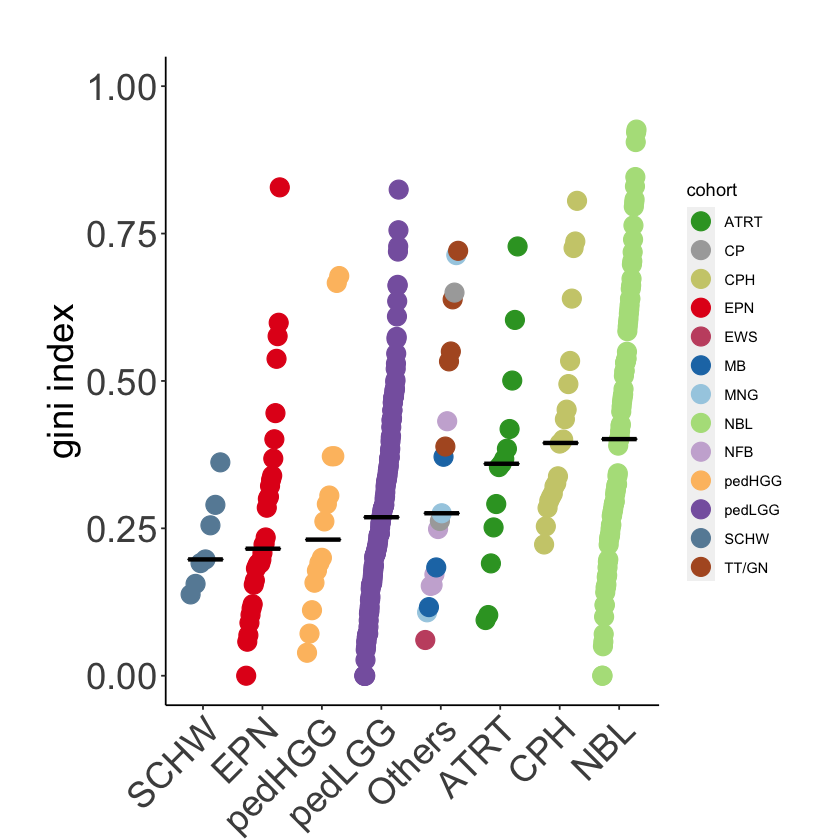

In [21]:
Splot

In [88]:
pdf(file = paste0(plotpath,"gini_Splot_legend.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE)
Splot
dev.off()

pdf 
  2

## circle plot samples

In [195]:
head(clusteredsamples_gini_m[order(clusteredsamples_gini_m$gini, decreasing = T),])

,sample_id,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,gender,ethnicity,race,⋯,NK.cells,T.cells.CD4,T.cells.CD8,Tregs,Dendritic.cells,Other,unique_cdr3,gini,octamers,cohortgroup
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<fct>
334,TARGET-30-PATGJU-01A,TARGET-30-PATGJU-01A-01R,-123.66940,-512.986,-636.6553,8bd4f593-7cab-42f0-b604-044442bb661e.bam,TARGET-30-PATGJU,Female,not hispanic or latino,White,⋯,0.06463039,0.108111256,0.0017327795,0.02421058,0.04686914,0.6558538,155,0.9263723,144,NBL
322,TARGET-30-PASTKC-01A,TARGET-30-PASTKC-01A-01R,50.23821,751.264,801.5023,58fb41e7-6659-4483-96ab-28c086f21d9f.bam,TARGET-30-PASTKC,Male,not hispanic or latino,White,⋯,0.03500674,0.042370458,0.0185950455,0.02497796,0.00000000,0.7125246,509,0.9214791,426,NBL
295,TARGET-30-PARACM-01A,TARGET-30-PARACM-01A-01R,39.93747,1587.657,1627.5946,9b93ed0a-1316-4dd4-bfd8-b6807927a7ad.bam,TARGET-30-PARACM,Female,not hispanic or latino,African,⋯,0.02711137,0.058944883,0.0355663920,0.02457737,0.00000000,0.6711838,85,0.9051970,77,NBL
290,TARGET-30-PAPVFD-01A,TARGET-30-PAPVFD-01A-01R,-1119.34030,576.530,-542.8103,c863478e-1746-43f1-8e1e-d87e0cc101ef.bam,TARGET-30-PAPVFD,Male,not hispanic or latino,White,⋯,0.05200814,0.126863799,0.0435739659,0.02795398,0.03434510,0.5940268,405,0.8458688,313,NBL
300,TARGET-30-PARKGJ-01A,TARGET-30-PARKGJ-01A-01R,754.31640,1293.906,2048.2224,76263959-d77a-47d4-aed5-66ded04d0b9e.bam,TARGET-30-PARKGJ,Male,not hispanic or latino,White,⋯,0.01610949,0.003870874,0.0008619421,0.02947503,0.00000000,0.7371158,254,0.8301420,198,NBL
67,7316-1944,588348,14.80807,1273.023,1287.8313,56d670cc-2a5d-4d21-a2dd-7ffc140c6abb.rsem.genes.results,C457806,Female,Reported Unknown,Other,⋯,0.01214613,0.000000000,0.0000000000,0.00000000,0.00000000,0.9086957,38,0.8283591,38,EPN


In [196]:
length(clusteredsamples_gini_m$sample_id)

[1] 336

In [1982]:
for(s in clusteredsamples_gini_m$sample_id){
   circlepack.reads.fx(all_clustered_IGH_12rm, s)}

Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored


Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored
Non-leaf weights ignored


## Survival based on gini

In [304]:
tapply(clusteredsamples_gini_m$gini, clusteredsamples_gini_m$cohort, summary)

$ATRT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09444 0.25155 0.35955 0.35751 0.41846 0.72814 

$CP
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2625  0.3593  0.4562  0.4562  0.5530  0.6499 

$CPH
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2226  0.3073  0.3948  0.4334  0.5045  0.8055 

$EPN
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1599  0.2154  0.2667  0.3343  0.8284 

$EWS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06061 0.06061 0.06061 0.06061 0.06061 0.06061 

$MB
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1164  0.1500  0.1837  0.2238  0.2775  0.3714 

$MNG
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1075  0.1916  0.2756  0.3655  0.4945  0.7134 

$NBL
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2524  0.4013  0.4217  0.5960  0.9264 

$NFB
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1524  0.1538  0.1718  0.2317  0.2488  0.4317 

$pedHGG
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03896 

In [23]:
dim(clusteredsamples_gini_m)

[1] 336  36

In [24]:
summary(clusteredsamples_gini_m$gini)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1905  0.2951  0.3358  0.4633  0.9264 

In [25]:
highgini<- clusteredsamples_gini_m$sample_id[ clusteredsamples_gini_m$gini > 0.2951]

lowgini <- clusteredsamples_gini_m$sample_id[ clusteredsamples_gini_m$gini <= 0.2951]

In [26]:
gini_df_all <- primary_estimate_manifest_quanti[primary_estimate_manifest_quanti$sample_id %in% 
                                           clusteredsamples_gini_m$sample_id,]

In [27]:
table(gini_df_all$vital_status)


                Alive              Deceased Deceased-due to other 
                  265                    58                     1 
     Reported Unknown 
                   10 

In [28]:
gini_df_all$vital_status[gini_df_all$vital_status == "Deceased"] <- 1
gini_df_all$vital_status[gini_df_all$vital_status == "Alive"] <- 0
gini_df_all$vital_status <- as.numeric(as.character(gini_df_all$vital_status))

gini_df_all <- gini_df_all[!is.na(gini_df_all$vital_status),]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [29]:
gini_df_all$class <- NA
gini_df_all$class[ gini_df_all$sample_id %in% highgini  ] <- 1
gini_df_all$class[ gini_df_all$sample_id %in% lowgini ] <- 0

In [30]:
gini_df <- gini_df_all[gini_df_all$cohort == "NBL",]

In [31]:
sfit <- survfit(Surv(days_to_death, vital_status) ~ class, data= gini_df)

In [32]:
kmplot <- ggsurvplot(sfit, pval = TRUE, pval.size = 8,
           legend.title="using ped median 0.29", font.legend = 16, 
          font.main = 23, 
          font.x = 25,
          font.y = 25,
          font.tickslab = 20)

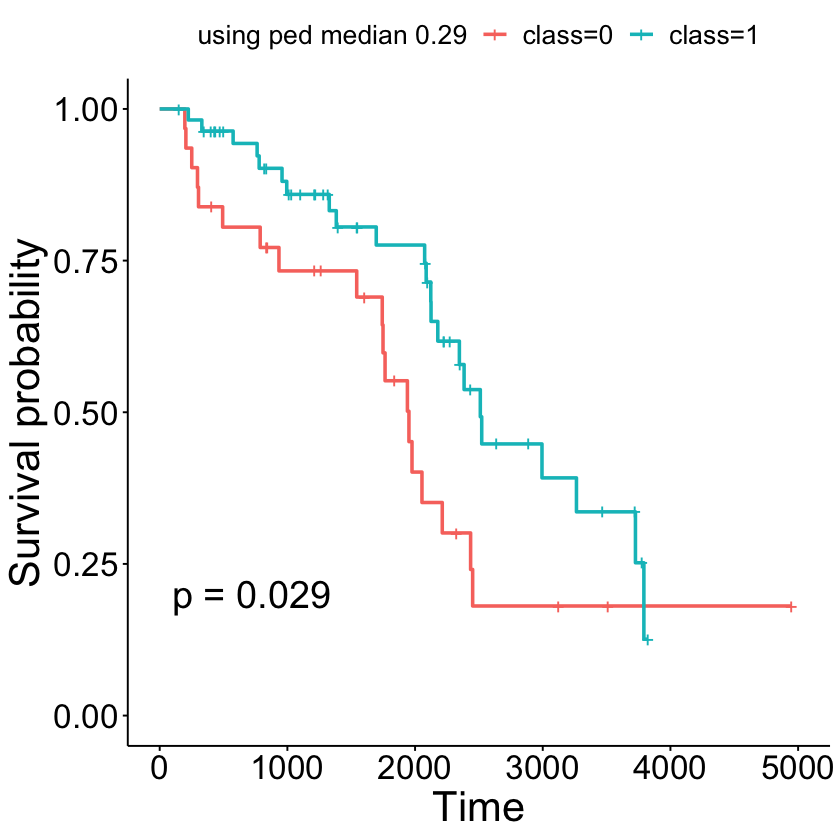

In [33]:
kmplot

In [371]:
pdf(file = paste0(plotpath,"nbl_KM_gini.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

## cytokine expression MHC class II and clonality

In [147]:
geneset_hm <- function(gene_mat, cohort_vector, estimate_manifest, geneset){
    subst_exp <- gene_mat[which(rownames(gene_mat) %in% geneset),]
   
    ## To order exp data based on geneset
    subst_exp <- subst_exp[geneset,]
    subst_exp <- log2(subst_exp + 1)   

    subst_exp_cases <- subst_exp[, colnames(subst_exp) %in% names(cohort_vector)]
    # This is to match the order in matrix to the cohorts
    subst_exp_cases <- subst_exp_cases[,names(cohort_vector)]
    subst_exp_cases <- as.matrix(subst_exp_cases)
    gene_hm = Heatmap(t(subst_exp_cases),
                         #titles and names   
                      name = "Gene expression (log2)",   
                      show_row_names = FALSE,
                      show_column_names = TRUE,     
                      #clusters and orders  
                      cluster_columns = FALSE,
                      cluster_rows = TRUE,
                 #     row_order = estimate_manifest$sample_id,

                      show_column_dend = FALSE,
                      row_dend_width = unit(8, "cm"),
                      column_order = geneset, 
                      #aesthestics
                      # col = col_fun_genes,
                      column_names_gp = gpar(fontsize = 28),
                      row_names_gp = gpar(fontsize = 2),
                      width = unit(length(geneset), "cm"),
                      column_title_gp = gpar(fontsize = 42),
                      column_title = NULL,
                      row_title = NULL
)

    return(gene_hm)
}

In [36]:
library(circlize)
library(ComplexHeatmap)

circlize version 0.4.9
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Attaching package: ‘circlize’

The following object is masked from ‘package:igraph’:

    degree

ComplexHeatmap version 1.99.5
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This version is a major update of the package. The major new features are:

1. Support split

In [37]:
load(paste0(datapath,"exp_mat/tpm_matrix_ped_final.RData"))

In [45]:
ls()

[1] "allcohorts"                       "circlepack.fx"                   
 [3] "circlepack.reads.fx"              "clusteredsamples_gini_m"         
 [5] "cohort_order"                     "colpal"                          
 [7] "datapath"                         "df.cohorts"                      
 [9] "disease.width"                    "div"                             
[11] "geneset_hm"                       "gini_df"                         
[13] "gini_df_all"                      "highgini"                        
[15] "i"                                "kmplot"                          
[17] "lowgini"                          "manifestpath"                    
[19] "mountpath"                        "myaxis"                          
[21] "mygensig"                         "myplot"                          
[23] "plotpath"                         "primary_estimate_manifest_quanti"
[25] "sfit"                             "sorted.df"                       
[27] "Splot"                            "start"                           
[29] "tmp"                              "tpm_matrix_ped_final"

In [38]:
clusteredsamples_gini_m$percread <- 8.0947988*exp(clusteredsamples_gini_m$ImmuneScore*0.0006267)

In [224]:
mygensig <- c('ACTN2',
'ADAM9',
'ADRA2B',
'AKAP10',
'ANG',
'ANXA5',
'APOA4',
'APOBEC3F',
'APOBEC3G',
'APOC1',
'ATOX1',
'BRPF3',
'C1QA',
'C1QC',
'C1R',
'C1S',
'C2',
'C3',
'C4BPB',
'C9',
'CA2',
'CALM1',
'CALM3',
'CASP1',
'CASP10',
'CASP3',
'CASP4',
'CASP5',
'CASP7',
'CASP9',
'CBLB',
'CCL5',
'CD36',
'CD40LG',
'CD46',
'CD55',
'CD59',
'CDA',
'CDH13',
'CDK5R1',
'CEBPB',
'CFB',
'CFH',
'CLU',
'COL4A2',
'CP',
'CPM',
'CPQ',
'CR1',
'CR2',
'CSRP1',
'CTSB',
'CTSC',
'CTSD',
'CTSH',
'CTSL',
'CTSO',
'CTSS',
'CTSV',
'CXCL1',
'DGKG',
'DGKH',
'DOCK10',
'DOCK4',
'DOCK9',
'DPP4',
'DUSP5',
'DUSP6',
'DYRK2',
'EHD1',
'ERAP2',
'F10',
'F2',
'F3',
'F5',
'F7',
'F8',
'FCER1G',
'FCN1',
'FDX1',
'FN1',
'FYN',
'GATA3',
'GCA',
'GMFB',
'GNAI2',
'GNAI3',
'GNB2',
'GNB4',
'GNG2',
'GNGT2',
'GP1BA',
'GP9',
'GPD2',
'GRB2',
'GZMA',
'GZMB',
'GZMK',
'HNF4A',
'HPCAL4',
'HSPA1A',
'HSPA5',
'IL6',
'IRF1',
'IRF2',
'IRF7',
'ITGAM',
'ITIH1',
'JAK2',
'KCNIP2',
'KCNIP3',
'KIF2A',
'KLK1',
'KLKB1',
'KYNU',
'L3MBTL4',
'LAMP2',
'LAP3',
'LCK',
'LCP2',
'LGALS3',
'LGMN',
'LIPA',
'LRP1',
'LTA4H',
'LTF',
'LYN',
'MAFF',
'ME1',
'MMP12',
'MMP13',
'MMP14',
'MMP15',
'MMP8',
'MSRB1',
'MT3',
'NOTCH4',
'OLR1',
'PCLO',
'PCSK9',
'PDGFB',
'PDP1',
'PFN1',
'PHEX',
'PIK3CA',
'PIK3CG',
'PIK3R5',
'PIM1',
'PLA2G4A',
'PLA2G7',
'PLAT',
'PLAUR',
'PLEK',
'PLG',
'PLSCR1',
'PPP2CB',
'PPP4C',
'PRCP',
'PRDM4',
'PREP',
'PRKCD',
'PRSS3',
'PRSS36',
'PSEN1',
'PSMB9',
'RABIF',
'RAF1',
'RASGRP1',
'RBSN',
'RCE1',
'RHOG',
'RNF4',
'S100A12',
'S100A13',
'S100A9',
'SCG3',
'SERPINA1',
'SERPINB2',
'SERPINC1',
'SERPINE1',
'SERPING1',
'SH2B3',
'SIRT6',
'SPOCK2',
'SRC',
'STX4',
'TFPI2',
'TIMP1',
'TIMP2',
'TMPRSS6',
'TNFAIP3',
'USP14',
'USP15',
'USP16',
'USP8',
'VCPIP1',
'WAS',
'XPNPEP1',
'ZEB1',
'ZFPM2')

In [209]:
clusteredsamples_gini_m <- clusteredsamples_gini_m[order(clusteredsamples_gini_m$gini),]

In [210]:
head(clusteredsamples_gini_m)

,sample_id,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,gender,ethnicity,race,⋯,NK.cells,T.cells.CD4,T.cells.CD8,Tregs,Dendritic.cells,Other,unique_cdr3,gini,octamers,cohortgroup
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<fct>
47,7316-175,564466,-268.6958,995.52685,726.83104,2f85907b-95a6-4c9c-b218-1a7597617546.rsem.genes.results,C38991,Male,Not Hispanic or Latino,White,⋯,0.007229524,0.000000000,0,0.0000000000,0.024434477,0.9332450,4,0,4,pedLGG
63,7316-1926,571409,-380.0087,657.22810,277.21939,0071cbef-6d2d-4328-b95b-f1076b66851a.rsem.genes.results,C291141,Male,Reported Unknown,Other,⋯,0.017194191,0.000000000,0,0.0032063607,0.017467104,0.8997184,3,0,3,pedLGG
120,7316-2589,739960,-400.1591,426.23067,26.07156,fe228267-13ef-4fbf-8743-c2a064f11458.rsem.genes.results,C806019,Female,Hispanic or Latino,Other,⋯,0.004023880,0.001857538,0,0.0008194433,0.006606206,0.9747062,4,0,4,pedLGG
186,7316-394,549591,-691.0090,10.30636,-680.70262,42ea7847-418a-4c2d-9b08-5a8cf6446cd5.rsem.genes.results,C85731,Male,Not Hispanic or Latino,White,⋯,0.018384618,0.000000000,0,0.0000000000,0.000000000,0.9467795,3,0,3,EPN
197,7316-437,731868,-951.8960,102.86221,-849.03382,97a2b6e5-f5f9-41c6-a470-3ac39af50fdc.rsem.genes.results,C95571,Male,Not Hispanic or Latino,White,⋯,0.036076055,0.000000000,0,0.0009395353,0.029968780,0.8969403,3,0,3,pedLGG
208,7316-499,571425,-383.7950,541.57042,157.77541,478d0e7c-490e-4844-a074-61c396a14ee5.rsem.genes.results,C116850,Male,Not Hispanic or Latino,Other,⋯,0.016720040,0.000000000,0,0.0000000000,0.118081662,0.8425354,3,0,3,pedLGG


In [211]:
unique(clusteredsamples_gini_m$cohort)

[1] "pedLGG" "EPN"    "NBL"    "pedHGG" "EWS"    "ATRT"   "MNG"    "MB"    
 [9] "SCHW"   "NFB"    "CPH"    "CP"     "TT/GN"

In [231]:
clusteredsamples_gini_m <- clusteredsamples_gini_m %>% arrange(cohort,desc(gini))

In [232]:
allcohorts <- factor(clusteredsamples_gini_m$cohort, 
                     levels =  unique(clusteredsamples_gini_m$cohort))
names(allcohorts) <- clusteredsamples_gini_m$sample_id
allcohorts <- allcohorts[order(allcohorts)]

In [233]:
table(allcohorts)

allcohorts
  ATRT     CP    CPH    EPN    EWS     MB    MNG    NBL    NFB pedHGG pedLGG 
    13      2     20     32      1      3      3     91      5     14    140 
  SCHW  TT/GN 
     7      5 

In [234]:
geneset <- geneset_hm(tpm_matrix_ped_final,  allcohorts, clusteredsamples_gini_m, mygensig)

In [235]:
gini <- clusteredsamples_gini_m$gini
    names(gini) <- clusteredsamples_gini_m$sample_id
    gini_cases <- gini[names(gini) %in% names(allcohorts)]
    # This is to match the order in matrix to the cohorts
    gini_cases <- gini_cases[names(allcohorts)]    
 
    col_fun_immun = colorRamp2(c(4,30), 
                               c("#ccebc5", "#084081"))   
    
    ht_gini = Heatmap(gini_cases,
                         #titles and names
                         name = "gini index",
                         show_row_names = TRUE,
                         show_column_names = TRUE,    
                         #clusters
                         cluster_columns = FALSE,
                         cluster_rows = FALSE,
                      row_order = clusteredsamples_gini_m$sample_id,
                         #aesthestics
                       #  col = col_fun_immun,
                         column_names_gp = gpar(fontsize = 28),
                         width = unit(1, "cm"),
                         column_title_gp = gpar(fontsize = 42),
                         row_title = NULL)

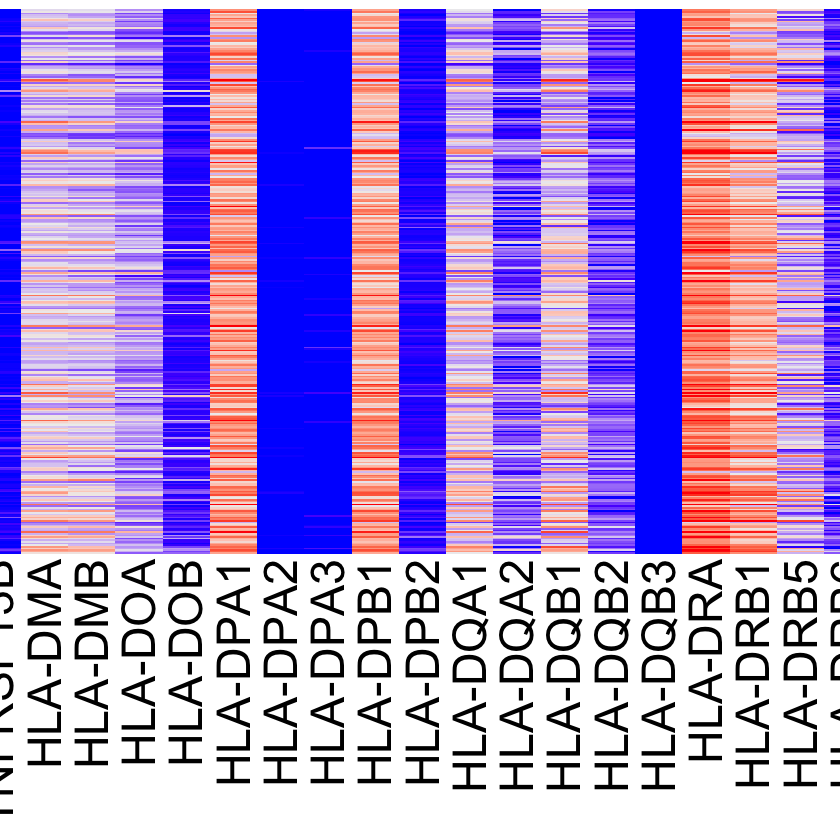

In [222]:
ht_gini + geneset

In [236]:
pdf(file = paste0(plotpath,"heatmap_TNF_C.pdf"),
        width = 100, 
        height = 80,
        useDingbats = FALSE)
    draw(ht_gini + geneset,
      ht_gap = unit(1, "cm"))
    dev.off()

pdf 
  2

## Deseq2 for NBL

In [94]:
nbl_gini <- clusteredsamples_gini_m[clusteredsamples_gini_m$cohort == "NBL",]

In [95]:
load(file = paste0(datapath, "exp_mat/TARGET_count_matrix_primary_dedup.RData"))

In [96]:
NBL_manifest <- read.table(paste0(manifestpath, "TARGET_NBL_Discovery_ClinicalData_20170525.txt"),
                          sep = "\t", na.strings = "", header = T, stringsAsFactors = F)

In [97]:
colnames(NBL_manifest)[colnames(NBL_manifest) == "TARGET.USI"] <- "case_id"

In [98]:
NBL_manifest_subset <- NBL_manifest[NBL_manifest$case_id %in% nbl_gini$case_id,]

In [99]:
nbl_gini <- merge(nbl_gini, NBL_manifest_subset[, c("case_id", "MYCN.status", "COG.Risk.Group")], by = "case_id")

In [100]:
dim(nbl_gini)

[1] 89 38

In [101]:
nbl_gini$subgroup <- NA
nbl_gini$subgroup[nbl_gini$gini > 0.2951] <- "High_gini"
nbl_gini$subgroup[nbl_gini$gini <= 0.2951] <- "Low_gini"

In [102]:
counts <- TARGET_count_matrix_primary_dedup
rownames(counts) <- counts$gene_symbol
counts$gene_symbol <- NULL
counts$ensembl <- NULL
counts <- counts[, colnames(counts) %in% nbl_gini$sample_id]
counts <- as.matrix(counts)
mode(counts) <- "integer"

In [103]:
dds <- DESeqDataSetFromMatrix(counts, colData = nbl_gini, 
                              design = ~subgroup + MYCN.status + COG.Risk.Group + ImmuneScore)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]


In [104]:
dds$subgroup <- relevel(dds$subgroup, ref = "Low_gini")

In [105]:
table(dds$subgroup)


 Low_gini High_gini 
       31        58 

In [106]:
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

In [107]:
head(rownames(dds))

[1] "TSPAN6"   "TNMD"     "DPM1"     "SCYL3"    "C1orf112" "FGR"

In [108]:
gtf <- read.table(file.path(datapath, "DEG/geneID_ensembl"), sep = "t",header = F, stringsAsFactors = F)
gtf$V2 <- trimws(gtf$V2)

In [109]:
dds <- dds[rownames(dds) %in% gtf$V2,]

In [110]:
dds <- DESeq(dds, parallel = TRUE)
res <- results(dds)

estimating size factors
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
estimating dispersions
gene-wise dispersion estimates: 2 workers
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warnin

In [111]:
resultsNames(dds)

[1] "Intercept"                                    
[2] "subgroup_High_gini_vs_Low_gini"               
[3] "MYCN.status_Not.Amplified_vs_Amplified"       
[4] "MYCN.status_Unknown_vs_Amplified"             
[5] "COG.Risk.Group_Intermediate.Risk_vs_High.Risk"
[6] "COG.Risk.Group_Low.Risk_vs_High.Risk"         
[7] "ImmuneScore"

In [112]:
myres <- results(dds, name = "subgroup_High_gini_vs_Low_gini")

In [114]:
myres$threshold <- NA
myres$threshold[ myres$log2FoldChange > 3 & myres$padj < 0.05] <- "Up"
myres$threshold[ myres$log2FoldChange < -3 & myres$padj < 0.05] <- "Down"
myres$threshold[ is.na(myres$threshold)] <- "none"

In [115]:
myres <- as.data.frame(myres)

In [116]:
table(myres$threshold)


 Down  none    Up 
   29 18267    15 

In [118]:
myres[ myres$threshold == "Up",]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,threshold
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SMPX,23.022779,3.068174,0.7165664,4.281772,0.000018541078077,0.003058609736,Up
GPR50,10.489860,3.093950,0.8751016,3.535532,0.000406954335279,0.031845046296,Up
PPY,13.325200,3.011988,0.6205433,4.853792,0.000001211228709,0.000326158954,Up
MYOG,21.181119,3.867378,0.7359444,5.254987,0.000000148035262,0.000056472368,Up
SCGB1D2,10.520305,4.470975,0.9243916,4.836667,0.000001320340475,0.000350387745,Up
SNTG1,23.658466,3.131958,0.7635093,4.102056,0.000040949524760,0.006046989902,Up
MAGEA8,184.102761,3.294909,0.6365742,5.176002,0.000000226690676,0.000083018659,Up
PASD1,8.820620,3.049099,0.8534827,3.572538,0.000353537742381,0.028771687114,Up
LMOD2,42.553297,3.900373,0.6741842,5.785323,0.000000007237314,0.000004274918,Up


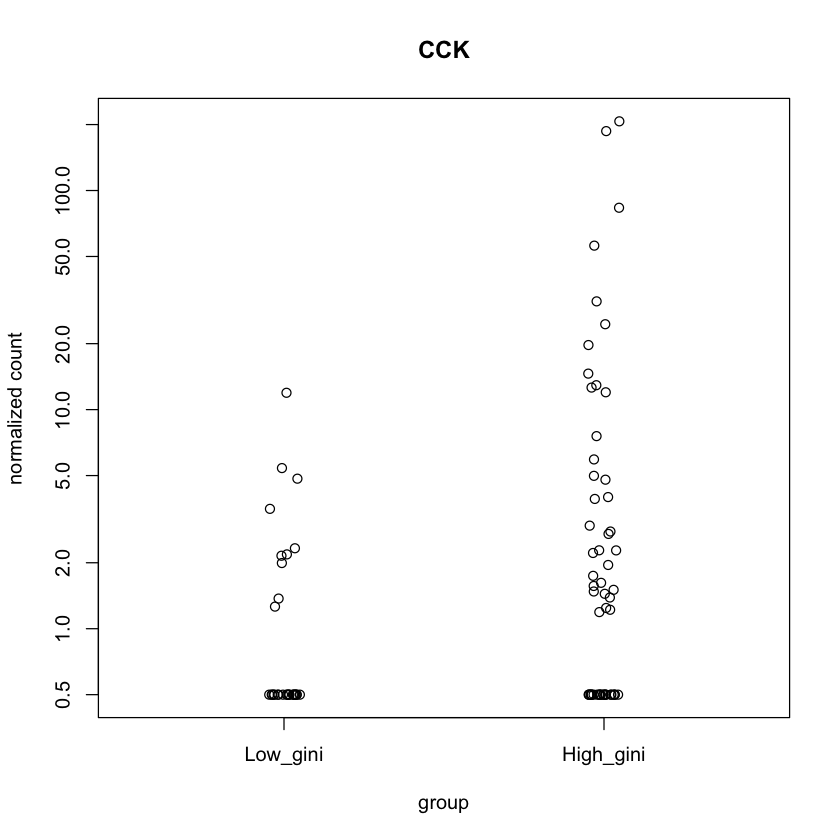

In [134]:
plotCounts(dds, gene = "CCK", intgroup = "subgroup")

In [119]:
resLFC <- lfcShrink(dds, coef="subgroup_High_gini_vs_Low_gini", type="apeglm")

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895


In [120]:
resLFC$threshold <- NA
resLFC$threshold[ resLFC$log2FoldChange > 3 & resLFC$padj < 0.05] <- "Up"
resLFC$threshold[ resLFC$log2FoldChange < -3 & resLFC$padj < 0.05] <- "Down"
resLFC$threshold[ is.na(resLFC$threshold)] <- "none"

In [121]:
resLFC <- as.data.frame(resLFC)

In [122]:
table(resLFC$threshold)


 Down  none    Up 
    7 18299     5 

In [123]:
resLFC[ resLFC$threshold == "Down",]

,baseMean,log2FoldChange,lfcSE,pvalue,padj,threshold
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
HSD17B2,81.82387,-3.914060,0.6550863,0.000000000048731580967435,0.00000004957355439415,Down
SLC10A1,42.91864,-3.789973,0.5150361,0.000000000000000036143845,0.00000000000022060998,Down
C4BPB,59.99565,-3.586994,0.5589226,0.000000000003043482273796,0.00000000506629126504,Down
MT1G,213.57945,-3.242613,0.5695852,0.000000000171065746681870,0.00000015661924437459,Down
ACOT12,41.85586,-3.680342,0.5569259,0.000000000000068173374316,0.00000000015604033214,Down
ADH6,60.65408,-4.129597,0.5568584,0.000000000000000008366914,0.00000000000007660328,Down
DIO1,35.20495,-3.505559,0.5203003,0.000000000000004796362551,0.00000000001463769911,Down


In [124]:
topdegs <- ggplot(as.data.frame(resLFC), aes(x=log2FoldChange, y=-log10(pvalue))) +
geom_point(aes(color = threshold), size=2.5) +
scale_colour_manual(values = c("Down"= "blue", "Up"="red",  "none"= "black")) +
xlab("log2 fold change") + ylab("-log10 p-value") + myplot 

In [125]:
ranks_nbl <- res$log2FoldChange
names(ranks_nbl) <- rownames(res)
ranks_nbl <- ranks_nbl[!is.na(ranks_nbl)]
head(ranks_nbl)

TSPAN6           TNMD           DPM1          SCYL3       C1orf112 
 0.00007964197  0.00054624195 -0.00011983894  0.00002592693 -0.00008083020 
           FGR 
-0.00031822089

In [126]:
Hs.H <- read.table(paste0(datapath, "DEG/h.all.v7.1.symbols.gmt"), 
                   header = F, check.names = F, sep = "\t", fill = T,
                  stringsAsFactors = F)

In [127]:
rownames(Hs.H) <- Hs.H$V1
Hs.H$V1 <- NULL
Hs.H$V2 <- NULL

In [128]:
Hs.H.list <- as.list(as.data.frame(t(Hs.H)))

In [129]:
library(fgsea)

Loading required package: Rcpp


In [130]:
fgseaRes_nbl <- fgsea(Hs.H.list, ranks_nbl, minSize=10, maxSize = 500, nperm=1000)

Warning message in fgsea(Hs.H.list, ranks_nbl, minSize = 10, maxSize = 500, nperm = 1000):
“There are ties in the preranked stats (0.03% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [131]:
gsea_nbl <- ggplot(fgseaRes_nbl, aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.05)) +
  coord_flip() +
labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + myplot #+ myaxis

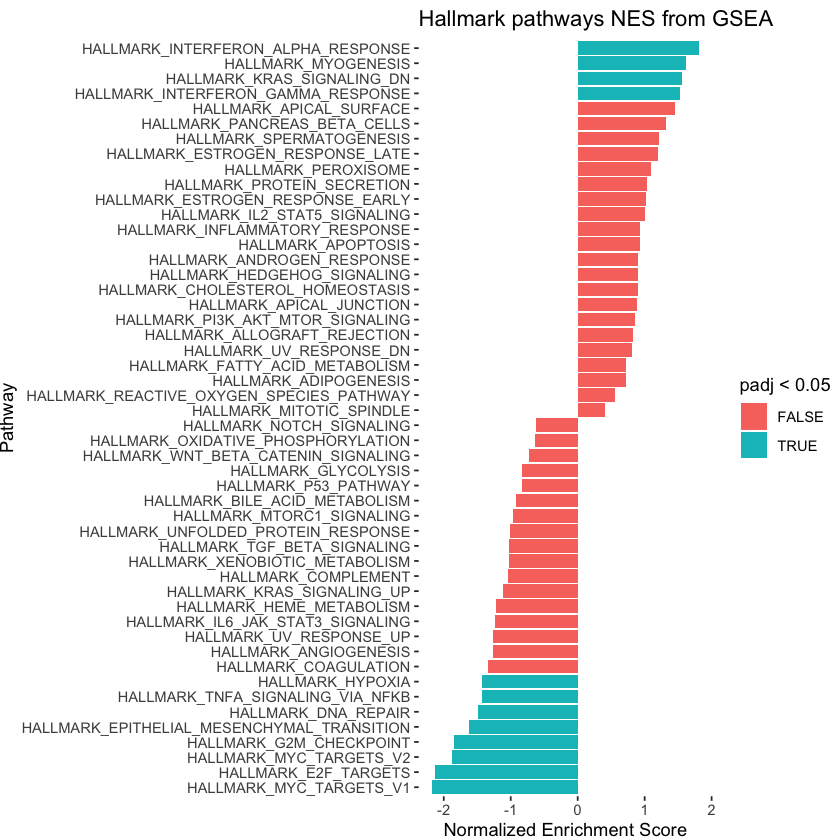

In [132]:
gsea_nbl

In [2697]:
alphaplot <- plotEnrichment(Hs.H.list[["HALLMARK_INTERFERON_ALPHA_RESPONSE"]], ranks_nbl) + labs(title = "HALLMARK_INTERFERON_ALPHA_RESPONSE")
gammaplot <- plotEnrichment(Hs.H.list[["HALLMARK_INTERFERON_GAMMA_RESPONSE"]], ranks_nbl) + labs(title = "HALLMARK_INTERFERON_GAMMA_RESPONSE")

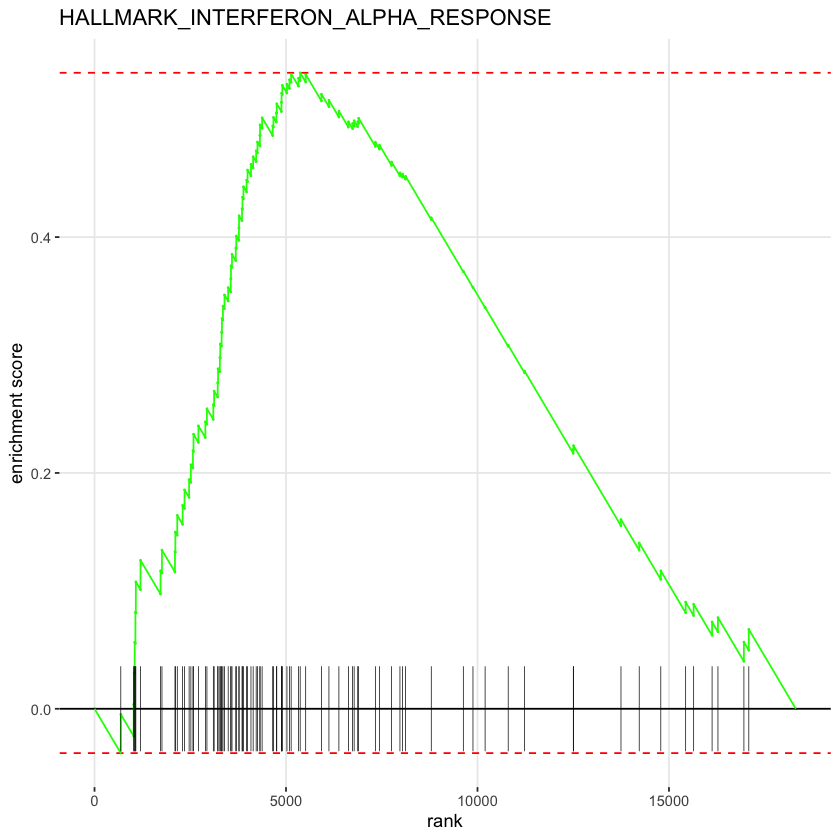

In [2698]:
alphaplot

In [2701]:
pdf(file = paste0(plotpath,"nbl_IFNalpha_gsea.pdf"),
    width = 10, 
    height = 5,
    useDingbats = FALSE,
    onefile = FALSE)
alphaplot
dev.off()

pdf 
  2

In [2702]:
pdf(file = paste0(plotpath,"nbl_IFNgamma_gsea.pdf"),
    width = 10, 
    height = 5,
    useDingbats = FALSE,
    onefile = FALSE)
gammaplot
dev.off()

pdf 
  2

# Table S6

In [14]:
colnames(clusteredsamples_gini_m)

[1] "sample_id"        "aliquot_id"       "StromalScore"     "ImmuneScore"     
 [5] "ESTIMATEScore"    "name"             "case_id"          "gender"          
 [9] "ethnicity"        "race"             "age_at_diagnosis" "vital_status"    
[13] "days_to_death"    "days_to_progress" "recurrence"       "disease_type"    
[17] "primary_site"     "group"            "cohort"           "sample_type"     
[21] "age_class"        "B.cells"          "Macrophages.M1"   "Macrophages.M2"  
[25] "Monocytes"        "Neutrophils"      "NK.cells"         "T.cells.CD4"     
[29] "T.cells.CD8"      "Tregs"            "Dendritic.cells"  "Other"           
[33] "unique_cdr3"      "gini"             "octamers"

In [20]:
cols <- c("sample_id", "case_id", "cohort", "group", "unique_cdr3", "octamers","gini")

In [21]:
tables6 <- clusteredsamples_gini_m[,cols]

In [22]:
tables6$sample_id <- gsub("7316", "X7316", tables6$sample_id)

In [23]:
write.csv(tables6,
          file = paste0(datapath, "TableS6.csv"),row.names = FALSE)

# Numbers in text

In [80]:
dim(clusteredsamples_gini_m)

[1] 336  36

In [81]:
df.cohorts

,cohortgroup,median,Median.start,Median.stop,N,medianloc
,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
5,SCHW,0.1972789,6.0000,42,7,24.00000
3,EPN,0.2154472,73.3125,114,32,93.65625
7,pedHGG,0.2308642,147.0000,186,14,166.50000
4,pedLGG,0.2688415,216.3000,258,140,237.15000
1,Others,0.2755760,290.2105,330,19,310.10526
6,ATRT,0.3595506,363.2308,402,13,382.61538
2,CPH,0.3948264,434.1000,474,20,454.05000
8,NBL,0.4013406,504.4615,546,91,525.23077


In [94]:
dim(gini_df)

[1] 91 33

# Deprecated

## Clusters

compare normalized clusters in samples with > 10 cdr3 

In [373]:
cdr3_count <- cdr3_count[cdr3_count$cdr3 > 10,]

In [374]:
dim(cdr3_count)

[1] 258   4

In [375]:
cdr3_count_clusters <- cdr3_count[cdr3_count$cdr3 > 26,]

In [376]:
dim(cdr3_count_clusters)

[1] 182   4

normalize cllusters / cdr3

In [377]:
cdr3_count_clusters$Normclusters <- cdr3_count_clusters$cluster/cdr3_count_clusters$cdr3

In [378]:
summary(cdr3_count_clusters$Normclusters)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.004931 0.012505 0.020976 0.090909 

In [379]:
head(cdr3_count_clusters[order(cdr3_count_clusters$Normclusters, decreasing = T),])

,sample_id,cdr3,octamer,cluster,Normclusters
,<chr>,<int>,<int>,<int>,<dbl>
184,7316-2782,44,18,4,0.09090909
110,7316-205,29,19,2,0.06896552
450,TARGET-30-PASMNT-01A,1506,856,103,0.06839309
194,7316-2959,175,129,11,0.06285714
7,7316-1081,64,48,4,0.06250000
374,TARGET-30-PALEVG-01A,145,89,8,0.05517241


merge the table with master df

In [380]:
ped_clusters <- merge(primary_estimate_manifest_quanti, cdr3_count_clusters, by = "sample_id")

only > -1000

In [381]:
ped_clusters <- ped_clusters[ped_clusters$ImmuneScore > -1000,]

In [382]:
dim(ped_clusters)

[1] 170  36

In [383]:
table(ped_clusters$cohort)


  ATRT     CP    CPH    EPN     MB    MNG    NBL    NFB pedHGG pedLGG   SCHW 
     7      1     17     12      1      2     61      1      2     60      3 
 TT/GN 
     3 

In [384]:
summary(ped_clusters$ImmuneScore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -985.0   328.1   790.0   778.3  1288.7  2836.2 

## Splot of number of cdr3s and clusters

only those with more than 2 cdr3

In [ ]:
cdr3_count_all <- cdr3_count

In [ ]:
dim(cdr3_count_all)

In [ ]:
cdr3_count <- cdr3_count_all[cdr3_count_all$cdr3 > 2,]

In [ ]:
dim(cdr3_count)

In [ ]:
summary(cdr3_count$cdr3)

In [ ]:
summary(cdr3_count$cluster)

Include only those cdr3 that had an octamer and was included in clyster analstysi

In [ ]:
cdr3_count <- cdr3_count[!is.na(cdr3_count$cluster),]

In [ ]:
dim(cdr3_count)

In [ ]:
ped_cdr3count <- merge(primary_estimate_manifest_quanti, cdr3_count, by = "sample_id")

In [ ]:
head(ped_cdr3count)

In [ ]:
dim(ped_cdr3count)

In [ ]:
table(ped_cdr3count$cohort)

In [ ]:
colpal <- c("MB_PDX" = "#878787", #PDX
            "ETMR" = "#76afa9", #ped
            "MNG" = "#a6cee3", 
            "MB" =  "#1f78b4",
            "SCHW" =  "#678ba5",
            "ATRT" =  "#33a02c",
            "EPN" = "#e31a1c",
            "pedHGG" = "#fdbf6f",
            "pedLGG" = "#8763ae",
            "NFB" = "#cab2d6",
            "CPH" = "#cccc7a",
            "TT/GN" = "#b15928",
            "CP" = "#a9a9a9",
            "NBL" = "#b2df8a",
            "EWS" = "#C65370",
            
            "SKCM" = "#7c9c60", #Adult
            "LGG" = "#753a00",
            "GBM" = "#6a3d9a",
            "OV" = "#afaf78",
            "PRAD" = "#a85426",
            "LUAD" = "#ad3837",
            "COAD" = "#726579",
            "EMPTY1" = "#FFFFFF",
            "EMPTY2" = "#FFFFFF")

In [ ]:
df.cohorts <- cbind.data.frame(unique(ped_cdr3count$cohort), NA, stringsAsFactors = F)
colnames(df.cohorts) <- c("cohort", "median") 

In [ ]:
for(i in 1:nrow(df.cohorts)){
    df.cohorts$median[i]<-median(ped_cdr3count$cdr3[ped_cdr3count$cohort == df.cohorts$cohort[i]])
} 
df.cohorts <- df.cohorts[order(df.cohorts$median),]

In [ ]:
df.cohorts

In [ ]:
disease.width <- (nrow(ped_cdr3count)/nrow(df.cohorts)) 
sorted.df <- ped_cdr3count[0,]
start = 0
for(i in 1:(nrow(df.cohorts))){
    tmp <- ped_cdr3count[ped_cdr3count$cohort==df.cohorts$cohort[i],]
    tmp <- tmp[order(tmp$cdr3),]
#create range of x values to squeeze dots into equal widths of the plot for each Disease regardless of the number of samples
    div <- disease.width/nrow(tmp)
    #If there is only one sample, put the dot in the middle of the alloted space
if(dim(tmp)[1]==1){
    tmp$Xpos<-start+(disease.width/2)
} 
    else tmp$Xpos <- seq(from = start, to = start+disease.width, by = div)[-1]
    sorted.df <- rbind(sorted.df, tmp)  
    df.cohorts$Median.start[i] <- tmp$Xpos[1]
    df.cohorts$Median.stop[i] <- tmp$Xpos[nrow(tmp)]
    df.cohorts$N[i]<-nrow(tmp)
    start <- start+disease.width+30
}
    df.cohorts$medianloc <- df.cohorts$Median.start+((df.cohorts$Median.stop-df.cohorts$Median.start)/2)
    sorted.df$cohort <- factor(sorted.df$cohort,
                               levels = df.cohorts$cohort)

In [ ]:
disease.width <- (nrow(sorted.df)/nrow(df.cohorts)) 
Splot <- ggplot() +
geom_point(data = sorted.df, aes(x = Xpos ,y = cdr3,color = cohort, size = cluster)) +
geom_crossbar(data = df.cohorts, aes(x =medianloc, y = median,ymin = median, ymax = median),width = disease.width) +
theme(axis.title.x = element_blank(),
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.line = element_line(color = "black"),
      axis.text = element_text(size = 22),
      axis.title = element_text(size = 22), 
      plot.title = element_text(size=22),
      legend.position = "none") +
theme(panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent",colour = NA),
      panel.border=element_blank(),
      plot.margin = unit(c(1.2,1,0,1),"cm")) +
scale_color_manual(values = colpal,guide = FALSE) +
scale_x_continuous(breaks = seq((disease.width)/2,max(sorted.df$Xpos),disease.width+30),
                   labels = df.cohorts$cohort) + 
labs(y = "number of IGH cdr3")  + 
annotation_logticks(sides = "l") +
scale_y_continuous(trans = "log10", 
                   limits = c(1, 10000),
                   breaks = c(1,10,100,1000,10000)) 

In [ ]:
Splot

## correlate normalized clusters with genes

In [414]:
load(file = paste0(datapath,"exp_mat/tpm_matrix_ped_final.RData"))

only samples with normaliized clusters

In [415]:
tpm_clusters <- tpm_matrix_ped_final[, colnames(tpm_matrix_ped_final) %in% ped_clusters$sample_id]

In [416]:
dim(tpm_clusters)

[1] 30594    93

remove genes with maximum tpm value of < 10

In [417]:
r <- apply(tpm_clusters,1, max )
remove <- which(r < 10 )

In [418]:
subst_exp_removedgenes <- tpm_clusters[-remove,]

In [419]:
dim(subst_exp_removedgenes)

[1] 15396    93

In [420]:
tpm_genes <- as.data.frame(t(subst_exp_removedgenes), stringsAsFactors = F)

In [421]:
tpm_genes$sample_id <- rownames(tpm_genes)

In [422]:
tpm_genes_clusters <- merge(ped_clusters, tpm_genes, by = "sample_id")

In [423]:
dim(tpm_genes_clusters)

[1]    93 15432

In [442]:
mycohorts <- c("ATRT", "CPH", "NBL", "pedLGG")

In [443]:
cormat_e <- matrix(ncol = length(mycohorts), nrow = nrow(subst_exp_removedgenes))
colnames(cormat_e) <- mycohorts
rownames(cormat_e) <- rownames(subst_exp_removedgenes)

cormat_p <- cormat_e
cormat_padj <- cormat_p

In [444]:
for(i in colnames(cormat_e)){
    tmp <- tpm_genes_clusters[tpm_genes_clusters$cohort == i,]

    for(g in rownames(cormat_e)){
       mytest <- pcor.test(tmp$Normclusters,
                  tmp[, colnames(tmp) == g],
                  tmp$ImmuneScore, 
                  method = "pearson")
     cormat_e[g,i] <- mytest$estimate   
    cormat_p[g,i] <- mytest$p.value
    cormat_padj[g,i] <- p.adjust(mytest$p.value, "fdr", n = length(cormat_padj))

    }
}

Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in sqrt

In [445]:
head(cormat_e)

,ATRT,CPH,NBL,pedLGG
7SK,-0.44971808,0.7706497,0.150726949,0.20407633
A1BG,0.22842203,-0.1690420,0.043715199,-0.03668807
A1BG-AS1,0.04512474,-0.5399710,-0.147204906,0.03173625
A2M,0.01274179,-0.3421874,0.006603921,-0.25322345
A4GALT,0.38866325,-0.2539127,-0.148679481,-0.10553709
AAAS,0.07050740,-0.5916770,0.155340566,0.08891875


In [459]:
tm <- which(cormat_padj < 0.02, arr.ind = TRUE)

tmestimate <- which(cormat_e > 0.5, arr.ind = TRUE)

In [460]:
tmestimate.df <- as.data.frame(tmestimate)

In [461]:
tmestimate.df$genes <- rownames(tmestimate)

In [462]:
tmp <- dcast(tmestimate.df, genes ~ col)

Using genes as value column: use value.var to override.


In [463]:
colnames(tmp) <- c("gene","ATRT", "CPH", "NBL", "pedLGG")

In [464]:
head(tmp)

gene,ATRT,CPH,NBL,pedLGG
<chr>,<chr>,<chr>,<chr>,<chr>
7SK,NA,7SK,NA,NA
AADAC,AADAC,NA,NA,NA
AASS,AASS,NA,NA,NA
ABCA12,ABCA12,NA,NA,NA
ABCA6,ABCA6,NA,NA,NA
ABCA9,ABCA9,NA,NA,NA


In [465]:
rownames(tmp) <- tmp$gene

In [466]:
meh <- rowSums(is.na(tmp))

In [467]:
summary(meh)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    3.00    3.00    2.98    3.00    3.00 

In [469]:
anothertmp <- meh[meh == 2]

In [470]:
mygenes <- rownames(tmestimate[rownames(tmestimate),]) # %in% rownames(tm),])

In [471]:
cormat_e[names(anothertmp),]

,ATRT,CPH,NBL,pedLGG
CXCR2,0.8985858,-0.33955634,0.06070877,0.5306568
DDX11L1,0.8691912,-0.04211367,0.03713076,0.5271425
GP1BA,0.8550667,-0.32571884,-0.03931053,0.5234871
HBA1,0.9350621,-0.04994619,-0.17824585,0.5211878
HBA2,0.9019074,-0.12072473,-0.17862795,0.5227755
HBB,0.9938643,0.13680625,-0.13738038,0.5300845
HEMGN,0.8157109,-0.17777081,-0.19379101,0.5391910
ITGA2B,0.7873810,-0.28853143,0.18412440,0.5533790
KRT23,0.7439827,0.06323058,-0.22702524,0.5212026
LGALS7B,0.7597678,0.50162551,-0.20504640,-0.1348606


In [99]:
mygenes spearman

[1] "AADAC"     "AASS"      "ABL2"      "ACKR1"     "AFAP1"     "AHR"      
 [7] "AK4"       "ANKRD26P1" "C7"        "CCL14"     "CCL3L3"    "CD3EAP"   
[13] "CDH11"     "CEP152"    "CHST9"     "CLIC2"     "COL5A2"    "CPA4"     
[19] "CRH"       "CRTAC1"    "DDX11L1"   "DHH"       "FAM124A"   "FAM27E3"  
[25] "FAR2P1"    "FGF13"     "GAL3ST1"   "GP1BA"     "HAS1"      "HBA1"     
[31] "HBA2"      "HBB"       "HDGFL1"    "HEG1"      "HK2"       "KIF26A"   
[37] "MEOX2"     "MIR17HG"   "MMP1"      "MMP10"     "MTND4P12"  "NETO1"    
[43] "NTRK1"     "OSR1"      "PF4"       "PLEKHH1"   "RFFL"      "SGK494"   
[49] "SLAIN1"    "SMIM10"    "STEAP4"    "TAC3"      "TGM2"      "TNFRSF10D"
[55] "TNNT2"     "TNS1"      "TRIM55"    "TRIM58"    "TRIO"      "VWF"      
[61] "WNT7B"     "ZEB1"

In [100]:
dim(cormat_e)

[1] 15412     4

In [103]:
head(cormat_e)

,ATRT,CPH,NBL,pedLGG
7SK,-0.37049379,0.23862675,0.31572466,0.21634531
A1BG,0.40866481,-0.19960979,0.10801181,-0.09545045
A1BG-AS1,0.02138158,-0.27928993,-0.08142678,-0.03006673
A2M,0.50164204,0.05963949,-0.13762471,-0.47770184
A4GALT,0.84210526,0.10901769,-0.09694984,-0.28037620
AAAS,-0.15728822,-0.50361993,0.14714988,0.14144354


In [113]:
rownames(cormat_e)[grepl("AIC", rownames(cormat_e))]

[1] "PAICS"

## levels of SHM ie normalized clusters in samples with > median cdr3 is assoctiaed with worse PFS in pedLGG

In [385]:
summary(ped_clusters$Normclusters)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.003453 0.012767 0.021464 0.090909 

In [467]:
highSHM <- ped_clusters$sample_id[ ped_clusters$Normclusters > 0]

lowSHM <- ped_clusters$sample_id[ ped_clusters$Normclusters == 0]

In [468]:
SHM_df_all <- primary_estimate_manifest_quanti[primary_estimate_manifest_quanti$sample_id %in% 
                                           ped_clusters$sample_id,]

In [469]:
dim(SHM_df_all)

[1] 170  32

In [470]:
table(SHM_df_all$vital_status)


           Alive         Deceased Reported Unknown 
             129               32                8 

In [471]:
SHM_df_all$vital_status[SHM_df_all$vital_status == "Deceased"] <- 1
SHM_df_all$vital_status[SHM_df_all$vital_status == "Alive"] <- 0
SHM_df_all$vital_status <- as.numeric(as.character(SHM_df_all$vital_status))

SHM_df_all <- SHM_df_all[!is.na(SHM_df_all$vital_status),]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [472]:
SHM_df_all$recurrence[SHM_df_all$recurrence == "Yes"] <- 1
SHM_df_all$recurrence[SHM_df_all$recurrence == "No"] <- 0
SHM_df_all$recurrence <- as.numeric(as.character(SHM_df_all$recurrence))

SHM_df_all <- SHM_df_all[!is.na(SHM_df_all$recurrence),]

In [473]:
SHM_df_all$class <- NA
SHM_df_all$class[ SHM_df_all$sample_id %in% highSHM  ] <- 1
SHM_df_all$class[ SHM_df_all$sample_id %in% lowSHM ] <- 0

In [474]:
table(SHM_df_all$cohort)


  ATRT     CP    CPH    EPN     MB    MNG    NBL    NFB pedHGG pedLGG   SCHW 
     6      1     16     11      1      2     56      1      2     54      3 
 TT/GN 
     3 

In [475]:
SHM_df <- SHM_df_all[SHM_df_all$cohort == "NBL",]

In [476]:
sfit <- survfit(Surv(days_to_death, vital_status) ~ class, data= SHM_df)

In [477]:
kmplot <- ggsurvplot(sfit, pval = TRUE, pval.size = 8,
           legend.title="using ped median 0.29", font.legend = 16, 
          font.main = 23, 
          font.x = 25,
          font.y = 25,
          font.tickslab = 20)

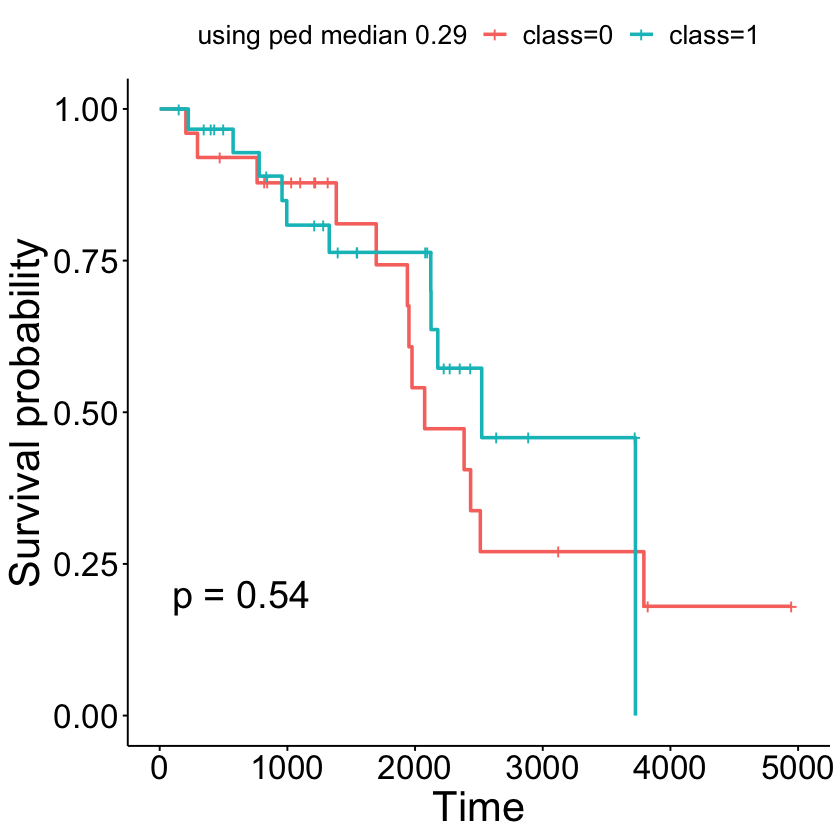

In [478]:
kmplot

## PFS

In [484]:
SHM_df <- SHM_df_all[SHM_df_all$cohort == "pedLGG",]

In [485]:
SHM_df <- SHM_df[!is.na(SHM_df$days_to_progress),]

In [486]:
sfit <- survfit(Surv(days_to_progress, recurrence) ~ class, data= SHM_df)

In [487]:
kmplot <- ggsurvplot(sfit, pval = TRUE, pval.size = 8,
           legend.title="using ped median 0.29", font.legend = 16, 
          font.main = 23, 
          font.x = 25,
          font.y = 25,
          font.tickslab = 20)

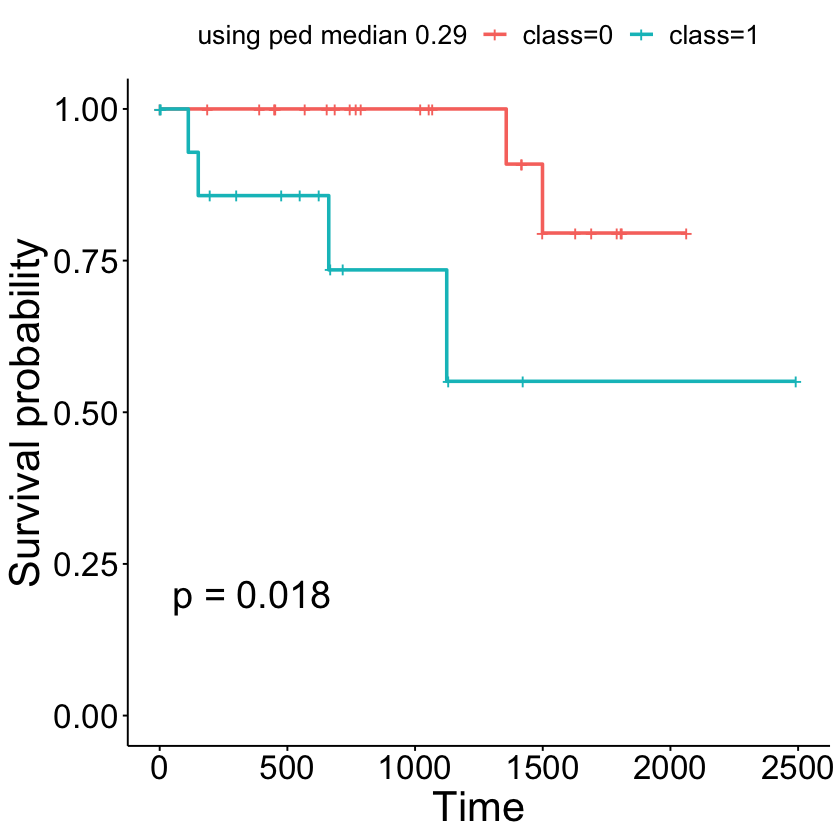

In [488]:
kmplot

## DEseq2 for CBTTC

In [38]:
cbttc_gini <- clusteredsamples_gini_m[clusteredsamples_gini_m$group == "CBTTC",]

In [2309]:
head(cbttc_gini)

sample_id,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,gender,ethnicity,race,⋯,NK.cells,T.cells.CD4,T.cells.CD8,Tregs,Dendritic.cells,Other,unique_cdr3,gini,octamers,cohortgroup
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<fct>
7316-10,717108,948.222412,1027.2452,1975.4676,cae75655-bec6-4ab6-af6f-e286f4cae404.rsem.genes.results,C15129,Female,Not Hispanic or Latino,African,⋯,0.006367036,0,0.000000000,0.001440083,0.000000000,0.9659597,5,0.15238095,5,Others
7316-100,601598,2.772548,407.5385,410.3111,a4aba99d-7974-4fa7-a2b2-a2b6b893273f.rsem.genes.results,C17958,Female,Hispanic or Latino,African,⋯,0.004966312,0,0.000000000,0.002843469,0.008077275,0.9406849,41,0.22261151,41,CPH
7316-1075,588351,-186.469439,669.7261,483.2567,f1ea5df0-95b3-436a-9168-036e482cb76f.rsem.genes.results,C291264,Male,Reported Unknown,Other,⋯,0.005879922,0,0.000000000,0.003544065,0.011611903,0.9477963,106,0.80550611,106,CPH
7316-1078,588352,-823.480878,-630.5107,-1453.9915,b38b70ba-1b14-49a8-9386-007bcb0ef2aa.rsem.genes.results,C291633,Male,Reported Unknown,Other,⋯,0.020550501,0,0.000000000,0.000000000,0.012290733,0.9618847,4,0.05769231,4,EPN
7316-1081,731897,-413.664076,879.1675,465.5034,1da1eb0c-f54d-4bce-8f02-55899fc8761f.rsem.genes.results,C410697,Male,Reported Unknown,Other,⋯,0.017985575,0,0.000000000,0.000000000,0.027998658,0.9272256,64,0.43494898,48,pedLGG
7316-1082,728285,1943.130795,2326.1879,4269.3187,f22d1fdf-64c6-456c-89e4-95a741ae455e.rsem.genes.results,C409467,Female,Reported Unknown,Other,⋯,0.003320855,0,0.002099164,0.003734566,0.001243847,0.9563279,1800,0.72544694,1560,CPH


In [2310]:
save(cbttc_gini, file = paste0(datapath, "diversity/cbttc_gini.RData"))

For cbttc I ran on mordor (immpedcan/CBTTC_rsem folder), metadata is generated in DESEq2_input notebook

In [2313]:
CBTTC_res <- read.csv(paste0(datapath, "DEG/CBTTC_results_gini_DEseq2_lfcshrink.csv"),
                     na.strings = "", header = T, stringsAsFactors = F)

In [2314]:
head(CBTTC_res)

X,baseMean,log2FoldChange,lfcSE,pvalue,padj
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
ENSG00000000003.14_TSPAN6,2163.38383,-0.000005142909,0.00144258368999273,0.5669524,0.989902218829006
ENSG00000000005.5_TNMD,24.41097,0.000003212988,0.00144268405070234,0.2481223,0.88486117332927
ENSG00000000419.12_DPM1,580.49456,0.000001552950,0.00144228053325439,0.9288682,0.999939361737336
ENSG00000000457.13_SCYL3,694.61765,0.000023307384,0.00144209507336209,0.3014621,0.910960932619357
ENSG00000000460.16_C1orf112,286.73021,-0.000002030814,0.00144240231191963,0.8890203,0.999939361737336
ENSG00000000938.12_FGR,763.61025,-0.000005874853,0.00144260252297391,0.4791756,0.970401473435717


In [2346]:
CBTTC_res$Gene <- gsub(".*_", "", CBTTC_res$X)

In [2347]:
CBTTC_res <- CBTTC_res[!duplicated(CBTTC_res$Gene),]

In [2348]:
rownames(CBTTC_res) <- CBTTC_res$Gene

In [2318]:
CBTTC_res$threshold[ CBTTC_res$log2FoldChange > 1 & CBTTC_res$padj < 0.05] <- "Up"
CBTTC_res$threshold[ CBTTC_res$log2FoldChange < -1 & CBTTC_res$padj < 0.05] <- "Down"
CBTTC_res$threshold[ is.na(CBTTC_res$threshold)] <- "none"

In [2349]:
rankscbttc <- CBTTC_res$log2FoldChange
names(rankscbttc) <- rownames(CBTTC_res)
rankscbttc <- rankscbttc[!is.na(rankscbttc)]
head(rankscbttc)

TSPAN6            TNMD            DPM1           SCYL3        C1orf112 
-0.000005142909  0.000003212988  0.000001552950  0.000023307384 -0.000002030814 
            FGR 
-0.000005874853

In [2350]:
Hs.H <- read.table(paste0(datapath, "DEG/h.all.v7.1.symbols.gmt"), 
                   header = F, check.names = F, sep = "\t", fill = T,
                  stringsAsFactors = F)

In [2351]:
rownames(Hs.H) <- Hs.H$V1
Hs.H$V1 <- NULL
Hs.H$V2 <- NULL

In [2352]:
Hs.H.list <- as.list(as.data.frame(t(Hs.H)))

In [2353]:
library(fgsea)

In [2354]:
fgseaRescbttc <- fgsea(Hs.H.list, rankscbttc, minSize=10, maxSize = 500, nperm=1000)

Warning message in fgsea(Hs.H.list, rankscbttc, minSize = 10, maxSize = 500, nperm = 1000):
“There are ties in the preranked stats (0.05% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [2359]:
gsea_timscbttc <- ggplot(fgseaRescbttc, aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.5)) +
  coord_flip() +
labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + myplot #+ myaxis

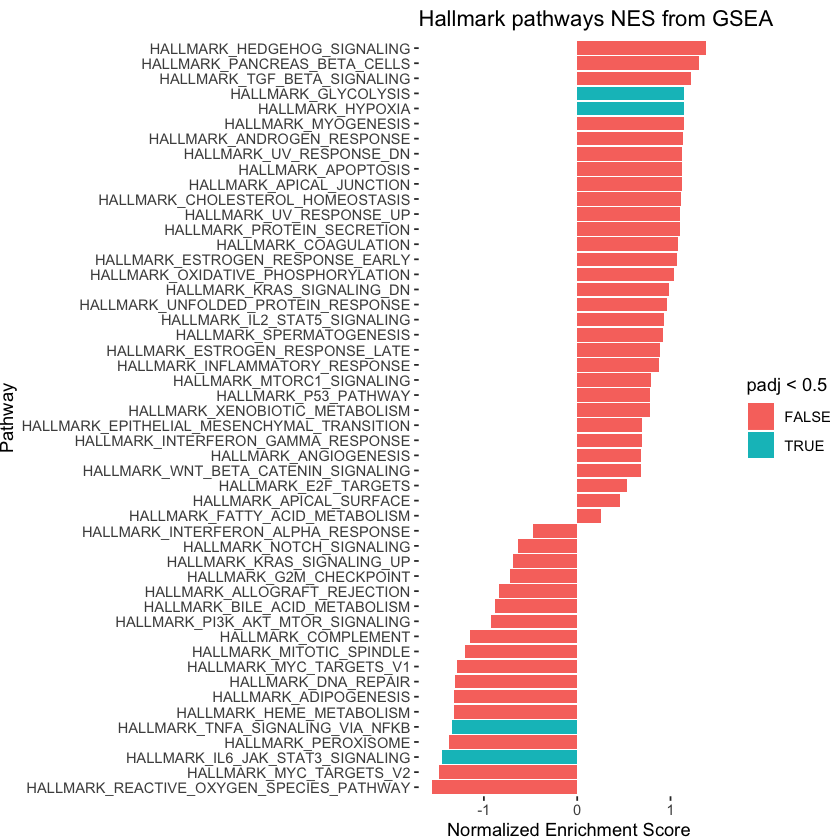

In [2360]:
gsea_timscbttc

## expression correlation

In [2361]:
load(file = paste0(datapath,"exp_mat/tpm_matrix_ped_final.RData"))

In [2364]:
head(tpm_matrix_ped_final)

,7316-1926,7316-489,7316-13,7316-3936,7316-873,7316-2669,7316-1928,7316-1655,7316-2622,7316-2893,⋯,ICGC_PA89,ICGC_PA9,ICGC_PA91,ICGC_PA92,ICGC_PA93,ICGC_PA94,ICGC_PA95,ICGC_PA96,ICGC_PA97,ICGC_PA99
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7SK,101.08,113.29,143.37,167.31,222.65,133.89,114.69,95.22,8.11,96.12,⋯,0.287477450,0.151004480,1.316372799,0.623302011,0.539007885,0.2323849,0.00000000,0.62421705,0.204103009,0.27949627
A1BG,0.82,3.00,2.33,2.07,3.87,0.60,1.64,1.01,3.29,0.92,⋯,0.730796870,0.578747186,1.432226226,1.305533013,1.757023498,0.6259475,0.66270817,0.95084569,0.856170521,0.90799219
A1BG-AS1,0.34,1.54,0.66,1.74,2.21,0.10,0.49,0.33,0.24,0.34,⋯,0.146521078,0.195147655,0.359481416,0.459126757,0.282787029,0.4634999,0.18452624,0.49039428,0.170731858,0.18425727
A1CF,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.003605546,0.005714179,0.003864498,0.008657391,0.007485289,0.0099566,0.01394094,0.01546211,0.007234758,0.01149084
A2M,270.92,22.46,58.90,40.02,39.74,52.95,34.72,4.87,11.78,34.41,⋯,35.557882596,135.803312502,63.220854602,63.728948340,148.016657993,79.4678037,97.16209388,64.46924760,71.294566832,120.79589095
A2M-AS1,0.38,0.21,0.23,0.43,0.35,0.38,0.98,0.14,0.05,0.33,⋯,0.744254574,0.442113424,0.197240583,0.916434869,0.189683206,0.7646672,0.21666408,0.50357142,0.318341732,0.40298729


only samples with gini measures

In [2529]:
tpm_gini <- tpm_matrix_ped_final[, colnames(tpm_matrix_ped_final) %in% clusteredsamples_gini_m$sample_id]

In [2530]:
dim(tpm_gini)

[1] 30594   336

remove genes with maximum tpm value of < 10

In [2531]:
r <- apply(tpm_gini,1, max )
remove <- which(r < 10 )

In [2532]:
subst_exp_removedgenes <- tpm_gini[-remove,]

In [2533]:
dim(subst_exp_removedgenes)

[1] 16730   336

In [2534]:
tpm_genes <- as.data.frame(t(subst_exp_removedgenes), stringsAsFactors = F)

In [2535]:
tpm_genes$sample_id <- rownames(tpm_genes)

In [2536]:
tpm_genes_gini <- merge(clusteredsamples_gini_m, tpm_genes, by = "sample_id")

In [2537]:
head(tpm_genes_gini)

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

sample_id,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,gender,ethnicity,race,⋯,ZSWIM8-AS1,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7316-10,717108,948.222412,1027.2452,1975.4676,cae75655-bec6-4ab6-af6f-e286f4cae404.rsem.genes.results,C15129,Female,Not Hispanic or Latino,African,⋯,0.00,0.20,0.25,0.30,0.13,1.95,0.84,23.80,1.78,1.57
7316-100,601598,2.772548,407.5385,410.3111,a4aba99d-7974-4fa7-a2b2-a2b6b893273f.rsem.genes.results,C17958,Female,Hispanic or Latino,African,⋯,0.06,1.34,1.74,1.26,1.32,5.33,4.30,31.42,5.38,7.72
7316-1075,588351,-186.469439,669.7261,483.2567,f1ea5df0-95b3-436a-9168-036e482cb76f.rsem.genes.results,C291264,Male,Reported Unknown,Other,⋯,0.05,0.88,1.27,1.39,1.00,7.00,3.26,38.51,6.49,7.20
7316-1078,588352,-823.480878,-630.5107,-1453.9915,b38b70ba-1b14-49a8-9386-007bcb0ef2aa.rsem.genes.results,C291633,Male,Reported Unknown,Other,⋯,0.02,0.26,0.99,0.25,0.23,5.07,1.32,10.73,2.37,1.83
7316-1081,731897,-413.664076,879.1675,465.5034,1da1eb0c-f54d-4bce-8f02-55899fc8761f.rsem.genes.results,C410697,Male,Reported Unknown,Other,⋯,0.03,0.74,1.52,0.73,0.79,5.96,3.82,33.74,5.59,6.00
7316-1082,728285,1943.130795,2326.1879,4269.3187,f22d1fdf-64c6-456c-89e4-95a741ae455e.rsem.genes.results,C409467,Female,Reported Unknown,Other,⋯,0.00,0.40,0.80,0.77,2.08,1.99,1.99,45.85,3.06,2.82


In [2564]:
mycohorts <- c("ATRT", "CPH", "NBL", "pedHGG", "pedLGG", "EPN")

In [2565]:
cormat_e <- matrix(ncol = length(mycohorts), nrow = nrow(subst_exp_removedgenes))
colnames(cormat_e) <- mycohorts
rownames(cormat_e) <- rownames(subst_exp_removedgenes)

cormat_p <- cormat_e
cormat_padj <- cormat_p

In [2566]:
for(i in colnames(cormat_e)){
    tmp <- tpm_genes_gini[tpm_genes_gini$cohort == i,]

    for(g in rownames(cormat_e)){
       mytest <- pcor.test(tmp$gini,
                  tmp[, colnames(tmp) == g],
                  tmp$ImmuneScore, 
                  method = "spearman")
     cormat_e[g,i] <- mytest$estimate   
    cormat_p[g,i] <- mytest$p.value
    cormat_padj[g,i] <- p.adjust(mytest$p.value, "fdr", n = length(cormat_padj))

    }
}

Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant

“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Mo

“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Mo

“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Mo

“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Mo

“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Mo

“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Mo

“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in cov2cor(icvx):
“diag(.) had 0 or NA entries; non-finite result is doubtful”Warning message in pcor(xyz, method = method):
“The inverse of variance-covariance matrix is calculated using Mo

In [2567]:
head(cormat_e)

,ATRT,CPH,NBL,pedHGG,pedLGG,EPN
7SK,0.004391746,-0.02766714,0.03447449,-0.09863188,-0.13229549,-0.47772066
A1BG,0.004546024,0.30016783,-0.00476459,-0.16648019,0.06585529,-0.15805262
A1BG-AS1,0.085164224,0.03008909,0.04498568,-0.53110710,0.01551964,-0.18287531
A1CF,0.003107593,0.14170698,0.05303157,-0.23741350,0.04327370,0.00427634
A2M,0.259993640,-0.09995725,0.12715378,-0.24092699,-0.03855307,0.07322829
A2M-AS1,0.393216336,0.13645387,-0.01249320,0.17599545,-0.10963813,-0.18461294


In [2605]:
tm <- which(cormat_padj < 0.01, arr.ind = TRUE)

tmestimate <- which(cormat_e > 0.3, arr.ind = TRUE)

In [2606]:
dim(tmestimate)

[1] 5772    2

In [2607]:
dim(tm)

[1] 28  2

In [2608]:
mygenes <- rownames(tmestimate[rownames(tmestimate) %in% rownames(tm),])

In [2609]:
mygenes

[1] "IGHG1"     "IGHG2"     "IGHG3"     "IGHV1-18"  "IGHV3-21"  "IGHV3-23" 
  [7] "IGHV3-30"  "IGHV3-48"  "IGHV3-7"   "IGHV4-39"  "IGHV4-59"  "IGHV4-61" 
 [13] "IGKC"      "IGKV1D-39" "IGKV3-11"  "IGKV3-15"  "IGKV3-20"  "IGKV3D-20"
 [19] "IGLC1"     "IGLC2"     "IGLC3"     "IGLL5"     "IGLV1-51"  "IGLV2-14" 
 [25] "IGLV2-23"  "IGLV3-19"  "IGLV3-21"  "MZB1"      "IGHG1"     "IGHG2"    
 [31] "IGHV1-18"  "IGHV3-23"  "IGHV3-30"  "IGHV3-48"  "IGHV3-7"   "IGHV4-39" 
 [37] "IGHV4-59"  "IGHV4-61"  "IGKC"      "IGKV1D-39" "IGKV3-11"  "IGKV3-15" 
 [43] "IGKV3-20"  "IGKV3D-20" "IGLC1"     "IGLC2"     "IGLL5"     "IGLV1-51" 
 [49] "IGLV2-14"  "IGLV2-23"  "IGLV3-19"  "IGLV3-21"  "MZB1"      "IGHG1"    
 [55] "IGHG3"     "IGHV1-18"  "IGHV3-21"  "IGHV3-23"  "IGHV3-30"  "IGHV3-48" 
 [61] "IGHV3-7"   "IGHV4-39"  "IGHV4-59"  "IGHV4-61"  "IGKC"      "IGKV3-20" 
 [67] "IGKV3D-20" "IGLC1"     "IGLC2"     "IGLC3"     "IGLL5"     "IGLV2-14" 
 [73] "IGLV2-23"  "IGLV3-19"  "IGLV3-21"  "IGHG1"     "IGHG2"     "IGHG3"    
 [79] "IGHV1-18"  "IGHV3-21"  "IGHV3-23"  "IGHV3-30"  "IGHV3-48"  "IGHV3-7"  
 [85] "IGHV4-39"  "IGHV4-59"  "IGHV4-61"  "IGKC"      "IGKV1D-39" "IGKV3-11" 
 [91] "IGKV3-15"  "IGKV3-20"  "IGKV3D-20" "IGLC1"     "IGLC2"     "IGLC3"    
 [97] "IGLL5"     "IGLV1-51"  "IGLV2-14"  "IGLV2-23"  "IGLV3-19"  "IGLV3-21" 
[103] "MZB1"      "IGHG1"     "IGHG2"     "IGHG3"     "IGHV1-18"  "IGHV3-23" 
[109] "IGHV3-30"  "IGHV3-48"  "IGHV3-7"   "IGHV4-39"  "IGHV4-59"  "IGHV4-61" 
[115] "IGKC"      "IGKV3-20"  "IGKV3D-20" "IGLC1"     "IGLC2"     "IGLL5"    
[121] "IGLV1-51"  "IGLV2-14"  "IGLV2-23"  "IGLV3-21"

## TMB and gini

In [11]:
load(paste0(datapath, "Diversity/clusteredsamples_gini.RData"))

In [13]:
load(file = paste0(datapath, "snv/total_mut_manifest_estimate_quanti.RData"))

In [15]:
ls()

[1] "circlepack.fx"                      "circlepack.reads.fx"               
 [3] "clusteredsamples_gini_m"            "datapath"                          
 [5] "manifestpath"                       "mountpath"                         
 [7] "myaxis"                             "myplot"                            
 [9] "plotpath"                           "primary_estimate_manifest_quanti"  
[11] "total_mut_manifest_estimate_quanti"

In [12]:
summary(clusteredsamples_gini_m$ImmuneScore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-984.95   36.95  575.06  592.65 1105.31 2836.15 

In [14]:
tmp <- clusteredsamples_gini_m[clusteredsamples_gini_m$cohort == "ATRT",]

In [15]:
tmp[order(tmp$gini),]

,sample_id,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,gender,ethnicity,race,⋯,Neutrophils,NK.cells,T.cells.CD4,T.cells.CD8,Tregs,Dendritic.cells,Other,unique_cdr3,gini,octamers
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
91,7316-2141,571446,-1221.10871,-140.4962,-1361.6049,9fb089a1-776b-4f6a-85d6-60147a3040a9.rsem.genes.results,C466293,Male,Not Hispanic or Latino,White,⋯,0.0000000000,0.003921086,0.000000000,0.0016440382,0.0000000000,0.000000000,0.9781513,10,0.09444444,10
234,7316-918,549562,-504.28565,321.8171,-182.4685,05983e05-8c70-4b7c-b57e-2189751db9f9.rsem.genes.results,C196554,Male,Not Hispanic or Latino,Other,⋯,0.0000000000,0.006104462,0.000000000,0.0000000000,0.0004686671,0.000000000,0.9682208,4,0.10294118,4
245,H049-GWNW,H049-GWNW,-848.20210,-162.0269,-1010.2290,H049-GWNW,H049-GWNW,Female,NA,NA,⋯,0.0000000000,0.031115719,0.000000000,0.0000000000,0.0000000000,0.000000000,0.8576712,20,0.19050633,20
94,7316-2181,588435,-371.28443,-631.1184,-1002.4028,7bc5de77-dbd7-49c9-a174-978b1c6c3df5.rsem.genes.results,C607743,Male,Not Hispanic or Latino,White,⋯,0.0000000000,0.004633920,0.011472808,0.0000000000,0.0034573573,0.002459742,0.9490449,14,0.25155280,14
96,7316-2187,608922,846.33962,781.7638,1628.1034,43062258-25f8-436d-980f-1cf1c9d44408.rsem.genes.results,C626193,Female,Not Hispanic or Latino,African,⋯,0.0000000000,0.011660135,0.000000000,0.0000000000,0.0000000000,0.011642594,0.9360190,37,0.29121864,36
129,7316-2688,731924,-746.64305,-254.1056,-1000.7487,78d8fb4e-5f82-4076-81fb-449d7cb50934.rsem.genes.results,C743535,Male,Hispanic or Latino,Other,⋯,0.0000000000,0.005377224,0.012119353,0.0000000000,0.0015292578,0.002522214,0.9465205,176,0.35390136,160
247,H049-UV6K,H049-UV6K,-228.38900,758.8701,530.4810,H049-UV6K,H049-UV6K,Male,NA,NA,⋯,0.0000000000,0.012458993,0.007998004,0.0197798638,0.0034231491,0.008363345,0.8350967,15,0.35955056,15
20,7316-122,549561,-79.55675,396.0924,316.5357,5b92dac6-3357-4ecc-9a99-05f7527cc68a.rsem.genes.results,C59655,Female,Not Hispanic or Latino,African,⋯,0.0000000000,0.012369211,0.000000000,0.0032570129,0.0003120519,0.000000000,0.9240525,109,0.36765487,97
17,7316-1137,746100,1014.78376,1893.8103,2908.5940,64053f63-20bf-4adf-9317-44ce93d92d9e.rsem.genes.results,C148707,Male,Not Hispanic or Latino,White,⋯,0.0000000000,0.004964622,0.000000000,0.0019723287,0.0002470318,0.000000000,0.9364915,19,0.38501660,19


In [16]:
clusteredsamples_gini_m_tmb <- merge(clusteredsamples_gini_m, 
                                     total_mut_manifest_estimate_quanti[,c("sample_id", "mutpermb")],
                                    by = "sample_id")

In [19]:
dim(clusteredsamples_gini_m_tmb$g)

[1] 264  36

In [24]:
myp_trb <- ggplot(data = clusteredsamples_gini_m_tmb,
                  aes(y = gini, x = mutpermb, label = sample_id)) + 
geom_point(aes(color = cohort), size = 5) +
geom_smooth(method = "lm", se = FALSE)+

scale_x_continuous(trans = "log10") +
annotation_logticks(sides = "b") 


`geom_smooth()` using formula 'y ~ x'


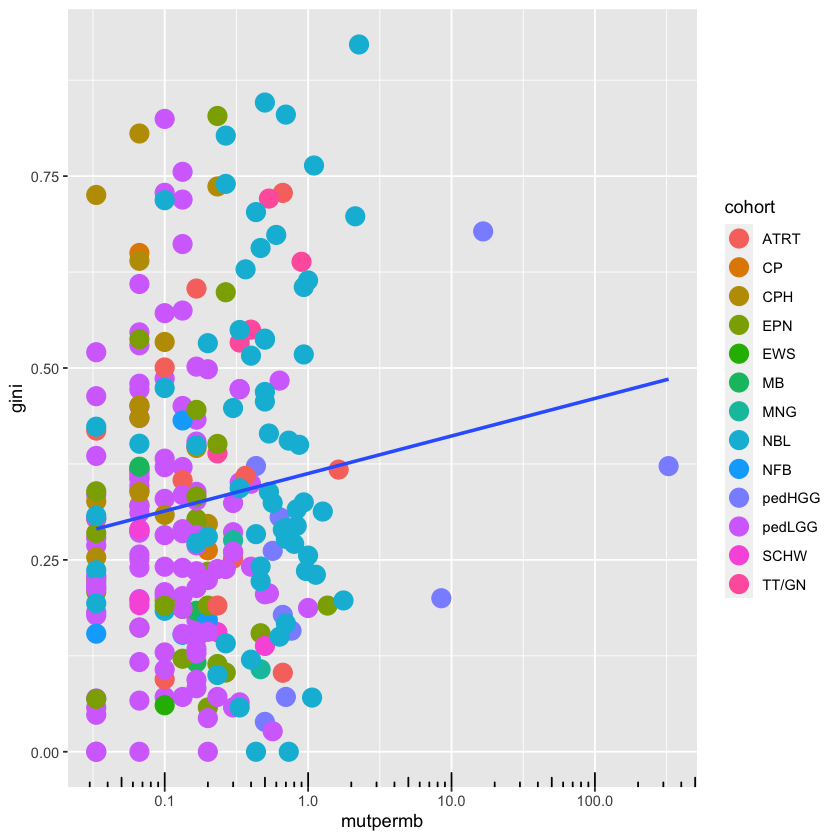

In [25]:
myp_trb